In [213]:
import pandas as pd

# Daten camping.ch
## Import

In [214]:
df_camping = pd.read_csv('campingspider/camping.csv', encoding='utf-8')
df_camping.head()

url  \
0  https://camping.ch/de/campingplatz/tessin/meri...   
1  https://camping.ch/de/campingplatz/wallis/fies...   
2  https://camping.ch/de/campingplatz/wallis/les-...   
3  https://camping.ch/de/campingplatz/berner-ober...   
4  https://camping.ch/de/campingplatz/tessin/mont...   

                        name                  locality website  star category  \
0  Camping Monte San Giorgio          6866 Meride (TI)     NaN              4   
1                  Eggishorn          3984 Fiesch (VS)     NaN              4   
2                La Médettaz  1923 Les Marécottes (VS)     NaN              2   
3                     Gadmen          3863 Gadmen (BE)     NaN              2   
4          Bosco della Bella       6998 Monteggio (TI)     NaN              0   

   activities  tourist pitches         open (seasons 1) open (seasons 2)  \
0           8             64.0  19.04.2024 − 29.09.2024              NaN   
1           6            127.0  01.01.2024 − 31.12.2024              NaN   
2           5             30.0  01.05.2024 − 30.09.2024              NaN   
3          11             50.0  01.05.2024 − 31.10.2024              NaN   
4           2              NaN  01.01.2024 − 31.12.2024              NaN   

  open (seasons 3)  ... laundry dryer / tumble dryer hiking  \
0              NaN  ...                            0      1   
1              NaN  ...                            0      1   
2              NaN  ...                            1      1   
3              NaN  ...                            0      0   
4              NaN  ...                            0      0   

  lake with sandy beach  lake with stony beach  river  train station  bus  \
0                     0                      0      1              0    1   
1                     0                      0      1              1    1   
2                     0                      0      0              1    1   
3                     0                      0      0              0    0   
4                     0                      0      1              0    0   

   VSC membership  TCS membership  SCCV membership  
0               1               1                0  
1               1               0                0  
2               0               0                0  
3               1               0                0  
4               0               0                0  

[5 rows x 48 columns]

## Ersetzen von falschen Werten

In [215]:
# Folgende drei Saisondaten waren falsch hinterlegt (mit null Tagen) und wurden deshalb manuell nachgeschaut. Die restlichen Saisondaten wurden nicht nachgeprüft.
corrections_date = {
    'Camping Bellavista': '12.04.2024 - 13.10.2024',
    'Camping Schaffhausen - Freizeitanlage Rheinwiese': '27.03.2024 - 20.10.2024',
    'Nufenenpark': '01.06.2024 - 30.09.2024'
}

# Funktion zur Korrektur der Datumsangaben
def correct_dates(row):
    if row['name'] in corrections_date:
        return corrections_date[row['name']]
    return row['open (seasons 1)']

# Datumsangaben im DataFrame korrigieren
df_camping['open (seasons 1)'] = df_camping.apply(correct_dates, axis=1)

In [216]:
# Quelle: Internetseite der Campingplätze. Es wurden nur die Campingplätze mit Anzahl Touristenplätze < 10 und 'nan' geprüft.
corrections_pitches = {
    'https://camping.ch/de/campingplatz/ostschweiz/weesen/camping-gaesi?l=true': 70,
    'https://camping.ch/de/campingplatz/waadt-genfersee/forel/camping-de-forel?l=true': 43,
    'https://camping.ch/de/campingplatz/ostschweiz/Altst%25C3%25A4tten/allmend_rheintal?l=true': 150,
    'https://camping.ch/de/campingplatz/wallis/ritzingen/camping-brigga?l=true': 127,
    'https://camping.ch/de/campingplatz/ostschweiz/mammern/seewiese?l=true': 95,
    'https://camping.ch/de/campingplatz/zentralschweiz/seelisberg/naturcamping_seelisberg?l=true': 60,
    'https://camping.ch/de/campingplatz/tessin/monteggio/boscodellabella?l=true': 10,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/le-noirmont/camping-du-creux-des-biches?l=true': 40,
    'https://camping.ch/de/campingplatz/zentralschweiz/sisikon/camping_bucheli?l=true': 50,
    'https://camping.ch/de/campingplatz/wallis/sembrancher/la-prairie?l=true': 48,
    'https://camping.ch/de/campingplatz/berner-mitelland/rueschegg-heubach/camping-rueschegg-heubach?l=true': 20,
    'https://camping.ch/de/campingplatz/zentralschweiz/morgarten/camping_neselen?l=true': 40,
    'https://camping.ch/de/campingplatz/berner-oberland/boenigen/seeruhe?l=true': 88,
    'https://camping.ch/de/campingplatz/ostschweiz/stein-a-rhein/grenzstein?l=true': 64,
    'https://camping.ch/de/campingplatz/berner-oberland/saanen/beim-kappeli?l=true': 27,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/rebeuvilier/du-raimeux?l=true': 31,
    'https://camping.ch/de/campingplatz/berner-oberland/gsteig-b-gstaad/bergcamping-gsteig?l=true': 16,
    'https://camping.ch/de/campingplatz/berner-oberland/schwenden-im-diemtigtal/camping-eggmatte-diemtigtal?l=true': 16,
    'https://camping.ch/de/campingplatz/freiburg-neuenburg-jura/le-landeron/bellerive-le-landeron?l=true': 50,
}

# Funktion zur Korrektur der Datumsangaben
def correct_dates(row):
    if row['url'] in corrections_pitches:
        return corrections_pitches[row['url']]
    return row['tourist pitches']

# Datumsangaben im DataFrame korrigieren
df_camping['tourist pitches'] = df_camping.apply(correct_dates, axis=1)

## Berechnung prozentuale Öffnungszeiten
Tage Jahr: 365 (Vereinfachung)

In [217]:
from datetime import datetime
# Tage von Öffnung bis Schliessung der Saison
def process_column_value(value):
    # leere Zellen:
    if pd.isna(value) or value == "":
        return 0
    try:
        # wenn ein Text vor dem Datum steht, sollen die Zeichen nach dem Doppelpunkt für das Datum verwendet werden
        if ':' in value:
            middle_value = value[value.find(':') + 2: value.find(':') + 12].strip()
            open_date = datetime.strptime(middle_value, '%d.%m.%Y')
            end_date = datetime.strptime(value[-10:].strip(), '%d.%m.%Y')
            return  (end_date - open_date).days
        end_date = datetime.strptime(value[-10:].strip(), '%d.%m.%Y')
        open_date = datetime.strptime(value[:10].strip(), '%d.%m.%Y')
        return (end_date - open_date).days
    except:
        print(f"Fehler bei der Verarbeitung von Wert {value}")
        return 0

# für alle Saison die Tage berechnen (falls mehrere) und zusammenzählen
def calculate_row(row):
    columns = ['open (seasons 1)', 'open (seasons 2)', 'open (seasons 3)', 'open (seasons 4)', 'open (seasons 5)', 'open (seasons 6)', 'open (seasons 7)']
    total = 0
    for col in columns:
        total += process_column_value(row[col])
    return total

# Neue Spalte mit Tagen erstellen, indem die Berechnung auf jede Zeile angewandt wird
df_camping['open[day]'] = df_camping.apply(calculate_row, axis=1)

In [218]:
# prozentualer Anteil der offenen Tage am Gesamtjahr
df_camping['open[%]'] = df_camping['open[day]']/365

In [219]:
df_camping

url  \
0    https://camping.ch/de/campingplatz/tessin/meri...   
1    https://camping.ch/de/campingplatz/wallis/fies...   
2    https://camping.ch/de/campingplatz/wallis/les-...   
3    https://camping.ch/de/campingplatz/berner-ober...   
4    https://camping.ch/de/campingplatz/tessin/mont...   
..                                                 ...   
372  https://camping.ch/de/campingplatz/graubuenden...   
373  https://camping.ch/de/campingplatz/wallis/sust...   
374  https://camping.ch/de/campingplatz/waadt-genfe...   
375  https://camping.ch/de/campingplatz/nordwestsch...   
376  https://camping.ch/de/campingplatz/tessin/gord...   

                                    name                  locality  \
0              Camping Monte San Giorgio          6866 Meride (TI)   
1                              Eggishorn          3984 Fiesch (VS)   
2                            La Médettaz  1923 Les Marécottes (VS)   
3                                 Gadmen          3863 Gadmen (BE)   
4                      Bosco della Bella       6998 Monteggio (TI)   
..                                   ...                       ...   
372                        Camping Rania          7432 Zillis (GR)   
373                     Camping Monument          3952 Susten (VS)   
374                          Bois-du-Fey           1430 Orges (VD)   
375                 Campingplatz Talhaus       4416 Bubendorf (BL)   
376  TCS Camping Gordevio – Valle Maggia        6672 Gordevio (TI)   

                    website  star category  activities  tourist pitches  \
0                       NaN              4           8             64.0   
1                       NaN              4           6            127.0   
2                       NaN              2           5             30.0   
3                       NaN              2          11             50.0   
4                       NaN              0           2             10.0   
..                      ...            ...         ...              ...   
372                     NaN              3           6             35.0   
373  www.campingmonument.ch              3           6            170.0   
374                     NaN              2           6             12.0   
375                     NaN              0           4             10.0   
376                     NaN              4          11            127.0   

            open (seasons 1) open (seasons 2) open (seasons 3)  ...  \
0    19.04.2024 − 29.09.2024              NaN              NaN  ...   
1    01.01.2024 − 31.12.2024              NaN              NaN  ...   
2    01.05.2024 − 30.09.2024              NaN              NaN  ...   
3    01.05.2024 − 31.10.2024              NaN              NaN  ...   
4    01.01.2024 − 31.12.2024              NaN              NaN  ...   
..                       ...              ...              ...  ...   
372  01.01.2024 − 31.12.2024              NaN              NaN  ...   
373  01.05.2024 − 24.09.2024              NaN              NaN  ...   
374  01.03.2024 − 31.10.2024              NaN              NaN  ...   
375  01.01.2024 − 31.12.2024              NaN              NaN  ...   
376  01.04.2024 − 24.10.2024              NaN              NaN  ...   

    lake with sandy beach lake with stony beach river  train station  bus  \
0                       0                     0     1              0    1   
1                       0                     0     1              1    1   
2                       0                     0     0              1    1   
3                       0                     0     0              0    0   
4                       0                     0     1              0    0   
..                    ...                   ...   ...            ...  ...   
372                     0                     0     1              0    1   
373                     0                     0     1              1    1   
374                     0                     0     0             

## Zusammenfassung der Attribute/Faktoren
z.B. Wassersportanlage ist vorhanden, wenn es entweder einen indoor swimming pool, unheated pool oder bathing facilities gibt. Dazu werden die Werte dieser Spalten zusammengezählt und wenn der Wert null ist, bleibt er null, ansonsten wird eine Eins in eine neue Spalte geschrieben.

In [220]:
# Sport Fields
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['sport field'] + row['golf'] + row['tennis']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['sport_fields_result'] = df_camping.apply(calculate_result, axis=1)

In [221]:
# Watersports Facilities
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['indoor swimming pool'] + row['unheated pool'] + row['bathing facilities']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['watersports_facilities_result'] = df_camping.apply(calculate_result, axis=1)

In [222]:
# Rentals
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['boat rental'] + row['bike rental']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['rentals_sporting_goods_result'] = df_camping.apply(calculate_result, axis=1)

In [223]:
# Restaurants, Bars
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['restaurant'] + row['take away']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['restaurant_bars_result'] = df_camping.apply(calculate_result, axis=1)

In [224]:
# shopping
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['shop with limited range'] + row['kiosk'] + row['shopping centre'] + row['shop with rich range']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['shopping_result'] = df_camping.apply(calculate_result, axis=1)

In [225]:
# washing
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['washing machine'] + row['laundry dryer / tumble dryer']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['washing_result'] = df_camping.apply(calculate_result, axis=1)

In [226]:
# water side
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['lake with sandy beach'] + row['lake with stony beach'] + row['river']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['water_side_result'] = df_camping.apply(calculate_result, axis=1)

In [227]:
# public transport
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['train station'] + row['bus']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['public_transport_result'] = df_camping.apply(calculate_result, axis=1)

In [228]:
# membership
# Summe bilden und wenn nicht null, dann eins
def calculate_result(row):
    total = row['VSC membership'] + row['TCS membership'] + row['SCCV membership']
    return 0 if total == 0 else 1

# Ergebnis in neue Spalte speichern
df_camping['membership_result'] = df_camping.apply(calculate_result, axis=1)

## Aufbau verkürzter Tabelle

In [229]:
df_camping_clean =df_camping[['url', 'name', 'locality', 'sport_fields_result', 'watersports_facilities_result', 'rentals_sporting_goods_result', 'entertainment', 'playground', 'disco', 'wifi', 'TV lounge', 'tourist pitches', 'easy access for disabled people', 'animals allowed', 'kitchen', 'BBQ area', 'open[%]', 'restaurant_bars_result', 'shopping_result', 'washing_result', 'star category', 'membership_result', 'hiking', 'water_side_result', 'activities', 'public_transport_result' ]]

In [230]:
df_camping_clean

url  \
0    https://camping.ch/de/campingplatz/tessin/meri...   
1    https://camping.ch/de/campingplatz/wallis/fies...   
2    https://camping.ch/de/campingplatz/wallis/les-...   
3    https://camping.ch/de/campingplatz/berner-ober...   
4    https://camping.ch/de/campingplatz/tessin/mont...   
..                                                 ...   
372  https://camping.ch/de/campingplatz/graubuenden...   
373  https://camping.ch/de/campingplatz/wallis/sust...   
374  https://camping.ch/de/campingplatz/waadt-genfe...   
375  https://camping.ch/de/campingplatz/nordwestsch...   
376  https://camping.ch/de/campingplatz/tessin/gord...   

                                    name                  locality  \
0              Camping Monte San Giorgio          6866 Meride (TI)   
1                              Eggishorn          3984 Fiesch (VS)   
2                            La Médettaz  1923 Les Marécottes (VS)   
3                                 Gadmen          3863 Gadmen (BE)   
4                      Bosco della Bella       6998 Monteggio (TI)   
..                                   ...                       ...   
372                        Camping Rania          7432 Zillis (GR)   
373                     Camping Monument          3952 Susten (VS)   
374                          Bois-du-Fey           1430 Orges (VD)   
375                 Campingplatz Talhaus       4416 Bubendorf (BL)   
376  TCS Camping Gordevio – Valle Maggia        6672 Gordevio (TI)   

     sport_fields_result  watersports_facilities_result  \
0                      0                              0   
1                      0                              1   
2                      0                              0   
3                      0                              0   
4                      0                              0   
..                   ...                            ...   
372                    0                              1   
373                    0                              1   
374                    0                              0   
375                    0                              0   
376                    0                              0   

     rentals_sporting_goods_result  entertainment  playground  disco  wifi  \
0                                1              0           0      0     0   
1                                0              0           1      0     0   
2                                1              0           0      0     0   
3                                0              0           0      0     0   
4                                0              0           0      0     0   
..                             ...            ...         ...    ...   ...   
372                              0              0           0      0     1   
373                              1              0           1      0     0   
374                              0              0           1      0     0   
375                              0              0           0      0     0   
376                              1              0           0      0     0   

     ...   open[%]  restaurant_bars_result  shopping_result  washing_result  \
0    ...  0.446575                       0                0               1   
1    ...  1.000000                       1                1               1   
2    ...  0.416438                       1                1               1   
3    ...  0.501370                       0                0               0   
4    ...  1.000000                       0                0               0   
..   ...       ...                     ...              ...             ...   
372  ...  1.000000                       1                0               1   
373  ...  0.400000                       1                1               1   
374  ...  0.668493                       0                0               1   
375  ...  1.000000                       1                0               1  

In [231]:
# Bearbeitete Daten als CSV speichern
df_camping_clean.to_csv('camping_clean.csv', encoding='utf-8', index=False)

# Manuelle Daten (Preis)
## Import

In [281]:
df_price = pd.read_csv('rohdaten_preis.csv', encoding='utf-8', sep=';')
df_price


url  \
0    https://camping.ch/de/campingplatz/graubuenden...   
1    https://camping.ch/de/campingplatz/graubuenden...   
2    https://camping.ch/de/campingplatz/graubuenden...   
3    https://camping.ch/de/campingplatz/graubuenden...   
4    https://camping.ch/de/campingplatz/graubuenden...   
..                                                 ...   
821  https://camping.ch/de/campingplatz/berner-mite...   
822  https://camping.ch/de/campingplatz/berner-mite...   
823  https://camping.ch/de/campingplatz/berner-mite...   
824  https://camping.ch/de/campingplatz/berner-mite...   
825  https://camping.ch/de/campingplatz/berner-mite...   

                                            Preisseite   Latitude  Longitude  \
0    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
1    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
2    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
3    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
4    https://camping-lenzerheide.ch/de/camping-st-c...  46.698692   9.558404   
..                                                 ...        ...        ...   
821  https://www.camping-lindenhof.ch/de/tarife-inf...  47.093373   7.210469   
822  https://www.camping-lindenhof.ch/de/tarife-inf...  47.093373   7.210469   
823                    https://seeland-camp.ch/preise/  47.162189   7.346157   
824                    https://seeland-camp.ch/preise/  47.162189   7.346157   
825  https://camping.ch/de/campingplatz/berner-mite...  46.785982   7.403469   

     pitch at the waterfront  other accommodation  small pitch (<80 m2)  \
0                        0.0                  1.0                     1   
1                        0.0                  1.0                     0   
2                        0.0                  1.0                     1   
3                        0.0                  1.0                     0   
4                        0.0                  1.0                     1   
..                       ...                  ...                   ...   
821                      0.0                  0.0                     1   
822                      0.0                  0.0                     0   
823                      0.0                  0.0                     1   
824                      0.0                  0.0                     1   
825                      0.0                  0.0                     1   

     medium pitch  (~100 m2)  large pitch  (>110 m2)  main season  low season  \
0                          0                       0            1           0   
1                          1                       0            1           0   
2                          0                       0            0           1   
3                          1                       0            0           1   
4                          0                       0            1           0   
..                       ...                     ...          ...         ...   
821                        0                       0            1           1   
822                        1                       0            1           1   
823                        0                       0            0           1   
824                        0                       0            1           0   
825                        0                       0            1           1   

     total_price  
0           38.0  
1           43.0  
2           40.0  
3           45.0  
4           37.0  
..           ...  
821         31.2  
822         37.2  
823         26.7  
824         28.7  
825         30.5  

[826 rows x 12 columns]

In [282]:
df_price.dtypes

url                         object
Preisseite                  object
Latitude                   float64
Longitude                  float64
pitch at the waterfront    float64
other accommodation        float64
small pitch (<80 m2)         int64
medium pitch  (~100 m2)      int64
large pitch  (>110 m2)       int64
main season                  int64
low season                   int64
total_price                float64
dtype: object

In [283]:
# Umwandlung der Spalte in float
#df_price['Breitengrad'] = df_price['Breitengrad'].astype(float)
#df_price['Laengengrad'] = df_price['Laengengrad'].astype(float)

In [284]:
len(df_price)

826

## Leere Zeilen löschen

In [287]:
# alle Zeilen, welche keinen Preis hinterlegt haben, werden gelöscht
df_price = df_price[df_price['total_price'] != 0]

In [288]:
len(df_price)

806

# Zusammenführen der Tabellen

In [289]:
# Basisliste ist manuell erstellte Liste (df_price)
df_camping_all  = pd.merge(df_price, df_camping_clean, on='url', how='left')

In [290]:
df_camping_all

url  \
0    https://camping.ch/de/campingplatz/graubuenden...   
1    https://camping.ch/de/campingplatz/graubuenden...   
2    https://camping.ch/de/campingplatz/graubuenden...   
3    https://camping.ch/de/campingplatz/graubuenden...   
4    https://camping.ch/de/campingplatz/graubuenden...   
..                                                 ...   
801  https://camping.ch/de/campingplatz/berner-mite...   
802  https://camping.ch/de/campingplatz/berner-mite...   
803  https://camping.ch/de/campingplatz/berner-mite...   
804  https://camping.ch/de/campingplatz/berner-mite...   
805  https://camping.ch/de/campingplatz/berner-mite...   

                                            Preisseite   Latitude  Longitude  \
0    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
1    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
2    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
3    https://camping-lenzerheide.ch/de/camping-grav...  46.722760   9.555440   
4    https://camping-lenzerheide.ch/de/camping-st-c...  46.698692   9.558404   
..                                                 ...        ...        ...   
801  https://www.camping-lindenhof.ch/de/tarife-inf...  47.093373   7.210469   
802  https://www.camping-lindenhof.ch/de/tarife-inf...  47.093373   7.210469   
803                    https://seeland-camp.ch/preise/  47.162189   7.346157   
804                    https://seeland-camp.ch/preise/  47.162189   7.346157   
805  https://camping.ch/de/campingplatz/berner-mite...  46.785982   7.403469   

     pitch at the waterfront  other accommodation  small pitch (<80 m2)  \
0                        0.0                  1.0                     1   
1                        0.0                  1.0                     0   
2                        0.0                  1.0                     1   
3                        0.0                  1.0                     0   
4                        0.0                  1.0                     1   
..                       ...                  ...                   ...   
801                      0.0                  0.0                     1   
802                      0.0                  0.0                     0   
803                      0.0                  0.0                     1   
804                      0.0                  0.0                     1   
805                      0.0                  0.0                     1   

     medium pitch  (~100 m2)  large pitch  (>110 m2)  main season  ...  \
0                          0                       0            1  ...   
1                          1                       0            1  ...   
2                          0                       0            0  ...   
3                          1                       0            0  ...   
4                          0                       0            1  ...   
..                       ...                     ...          ...  ...   
801                        0                       0            1  ...   
802                        1                       0            1  ...   
803                        0                       0            0  ...   
804                        0                       0            1  ...   
805                        0                       0            1  ...   

      open[%]  restaurant_bars_result shopping_result washing_result  \
0    1.000000                       0               0              1   
1    1.000000                       0               0              1   
2    1.000000                       0               0              1   
3    1.000000                       0               0              1   
4    1.000000                       1               0              1   
..        ...                     ...             ...            ...   
801  0.583562                       0               0              1   
802  0.583562              

In [291]:
len(df_camping_all)

806

## Spaltenreihenfolge ändern

In [292]:
# Neue Spaltenreihenfolge
new_order = ['name', 'locality', 'Latitude', 'Longitude', 'url', 'Preisseite', 'sport_fields_result', 'watersports_facilities_result', 'rentals_sporting_goods_result', 'entertainment', 'playground', 'disco', 'wifi', 'TV lounge', 'tourist pitches', 'other accommodation', 'pitch at the waterfront','small pitch (<80 m2)', 'medium pitch  (~100 m2)', 'large pitch  (>110 m2)', 'easy access for disabled people', 'animals allowed', 'kitchen', 'BBQ area', 'open[%]', 'main season', 'low season', 'restaurant_bars_result', 'shopping_result', 'washing_result', 'star category', 'membership_result', 'hiking', 'water_side_result', 'activities', 'public_transport_result', 'total_price']
df_camping_all = df_camping_all.reindex(columns=new_order)

In [293]:
df_camping_all

name                       locality   Latitude  \
0              Camping Gravas          7078 Lenzerheide (GR)  46.722760   
1              Camping Gravas          7078 Lenzerheide (GR)  46.722760   
2              Camping Gravas          7078 Lenzerheide (GR)  46.722760   
3              Camping Gravas          7078 Lenzerheide (GR)  46.722760   
4         Camping St. Cassian  7083 Lenz b. Lenzerheide (GR)  46.698692   
..                        ...                            ...        ...   
801                 Lindenhof    ch-2572 Sutz-Lattrigen (BE)  47.093373   
802                 Lindenhof    ch-2572 Sutz-Lattrigen (BE)  47.093373   
803              Seeland Camp           2554 Meinisberg (BE)  47.162189   
804              Seeland Camp           2554 Meinisberg (BE)  47.162189   
805  Camping Rüschegg-Heubach     3154 Rüschegg-Heubach (BE)  46.785982   

     Longitude                                                url  \
0     9.555440  https://camping.ch/de/campingplatz/graubuenden...   
1     9.555440  https://camping.ch/de/campingplatz/graubuenden...   
2     9.555440  https://camping.ch/de/campingplatz/graubuenden...   
3     9.555440  https://camping.ch/de/campingplatz/graubuenden...   
4     9.558404  https://camping.ch/de/campingplatz/graubuenden...   
..         ...                                                ...   
801   7.210469  https://camping.ch/de/campingplatz/berner-mite...   
802   7.210469  https://camping.ch/de/campingplatz/berner-mite...   
803   7.346157  https://camping.ch/de/campingplatz/berner-mite...   
804   7.346157  https://camping.ch/de/campingplatz/berner-mite...   
805   7.403469  https://camping.ch/de/campingplatz/berner-mite...   

                                            Preisseite  sport_fields_result  \
0    https://camping-lenzerheide.ch/de/camping-grav...                    0   
1    https://camping-lenzerheide.ch/de/camping-grav...                    0   
2    https://camping-lenzerheide.ch/de/camping-grav...                    0   
3    https://camping-lenzerheide.ch/de/camping-grav...                    0   
4    https://camping-lenzerheide.ch/de/camping-st-c...                    0   
..                                                 ...                  ...   
801  https://www.camping-lindenhof.ch/de/tarife-inf...                    0   
802  https://www.camping-lindenhof.ch/de/tarife-inf...                    0   
803                    https://seeland-camp.ch/preise/                    0   
804                    https://seeland-camp.ch/preise/                    0   
805  https://camping.ch/de/campingplatz/berner-mite...                    0   

     watersports_facilities_result  rentals_sporting_goods_result  \
0                                0                              1   
1                                0                              1   
2                                0                              1   
3                                0                              1   
4                                0                              1   
..                             ...                            ...   
801                              0                              0   
802                              0                              0   
803                              0                              0   
804                              0                              0   
805                              1                              0   

     entertainment  ...  restaurant_bars_result  shopping_result  \
0                0  ...                       0                0   
1                0  ...                       0                0   
2                0  ...                       0                0   
3                0  ...                       0                0   
4                0  ...                       1                0   
..             ...  ...                     ...              ...   
801              0  ...                  

In [294]:
df_camping_all.dtypes

name                                object
locality                            object
Latitude                           float64
Longitude                          float64
url                                 object
Preisseite                          object
sport_fields_result                  int64
watersports_facilities_result        int64
rentals_sporting_goods_result        int64
entertainment                        int64
playground                           int64
disco                                int64
wifi                                 int64
TV lounge                            int64
tourist pitches                    float64
other accommodation                float64
pitch at the waterfront            float64
small pitch (<80 m2)                 int64
medium pitch  (~100 m2)              int64
large pitch  (>110 m2)               int64
easy access for disabled people      int64
animals allowed                      int64
kitchen                              int64
BBQ area   

In [599]:
df_camping_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             806 non-null    object 
 1   locality                         806 non-null    object 
 2   Latitude                         806 non-null    float64
 3   Longitude                        806 non-null    float64
 4   url                              806 non-null    object 
 5   Preisseite                       806 non-null    object 
 6   sport_fields_result              806 non-null    int64  
 7   watersports_facilities_result    806 non-null    int64  
 8   rentals_sporting_goods_result    806 non-null    int64  
 9   entertainment                    806 non-null    int64  
 10  playground                       806 non-null    int64  
 11  disco                            806 non-null    int64  
 12  wifi                  

<Axes: >

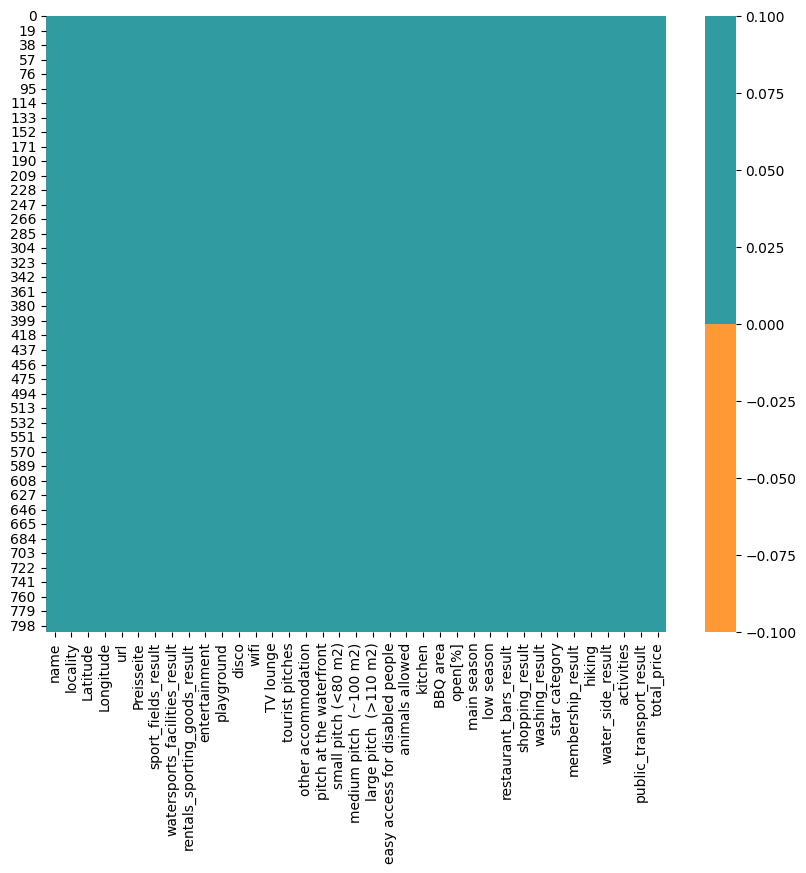

In [600]:
import matplotlib.pyplot as plt
import seaborn as sns                   # Seaborn = Aufsatz auf Matplotlib

plt.figure(figsize=(10,8))
cols = df_camping_all.columns[:50]

colors = ['#FF9933', '#309BA0']
sns.heatmap(df_camping_all[cols].isna(), cmap=sns.color_palette(colors))

# Visualisierung der Campingplätze
## Die Schweizer Campingplätze 2024 in der Übersicht

In [601]:
import folium

# Eine Folium-Karte erstellen
m = folium.Map(location=[df_camping_all['Latitude'].mean(), df_camping_all['Longitude'].mean()],tiles='Cartodb Positron', zoom_start=8.2,)


# Punkte auf die Karte hinzufügen
for idx, row in df_camping_all.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color='#309BA0',
        fill=True,
        fill_color='#309BA0',
        fill_opacity=1,
        popup=row['name']

    ).add_to(m)

# anzeigen
display(m)

## Korrelationen

In [296]:
df_correlation = df_camping_all.drop(['name', 'locality', 'Latitude', 'Longitude', 'url', 'Preisseite'], axis=1)

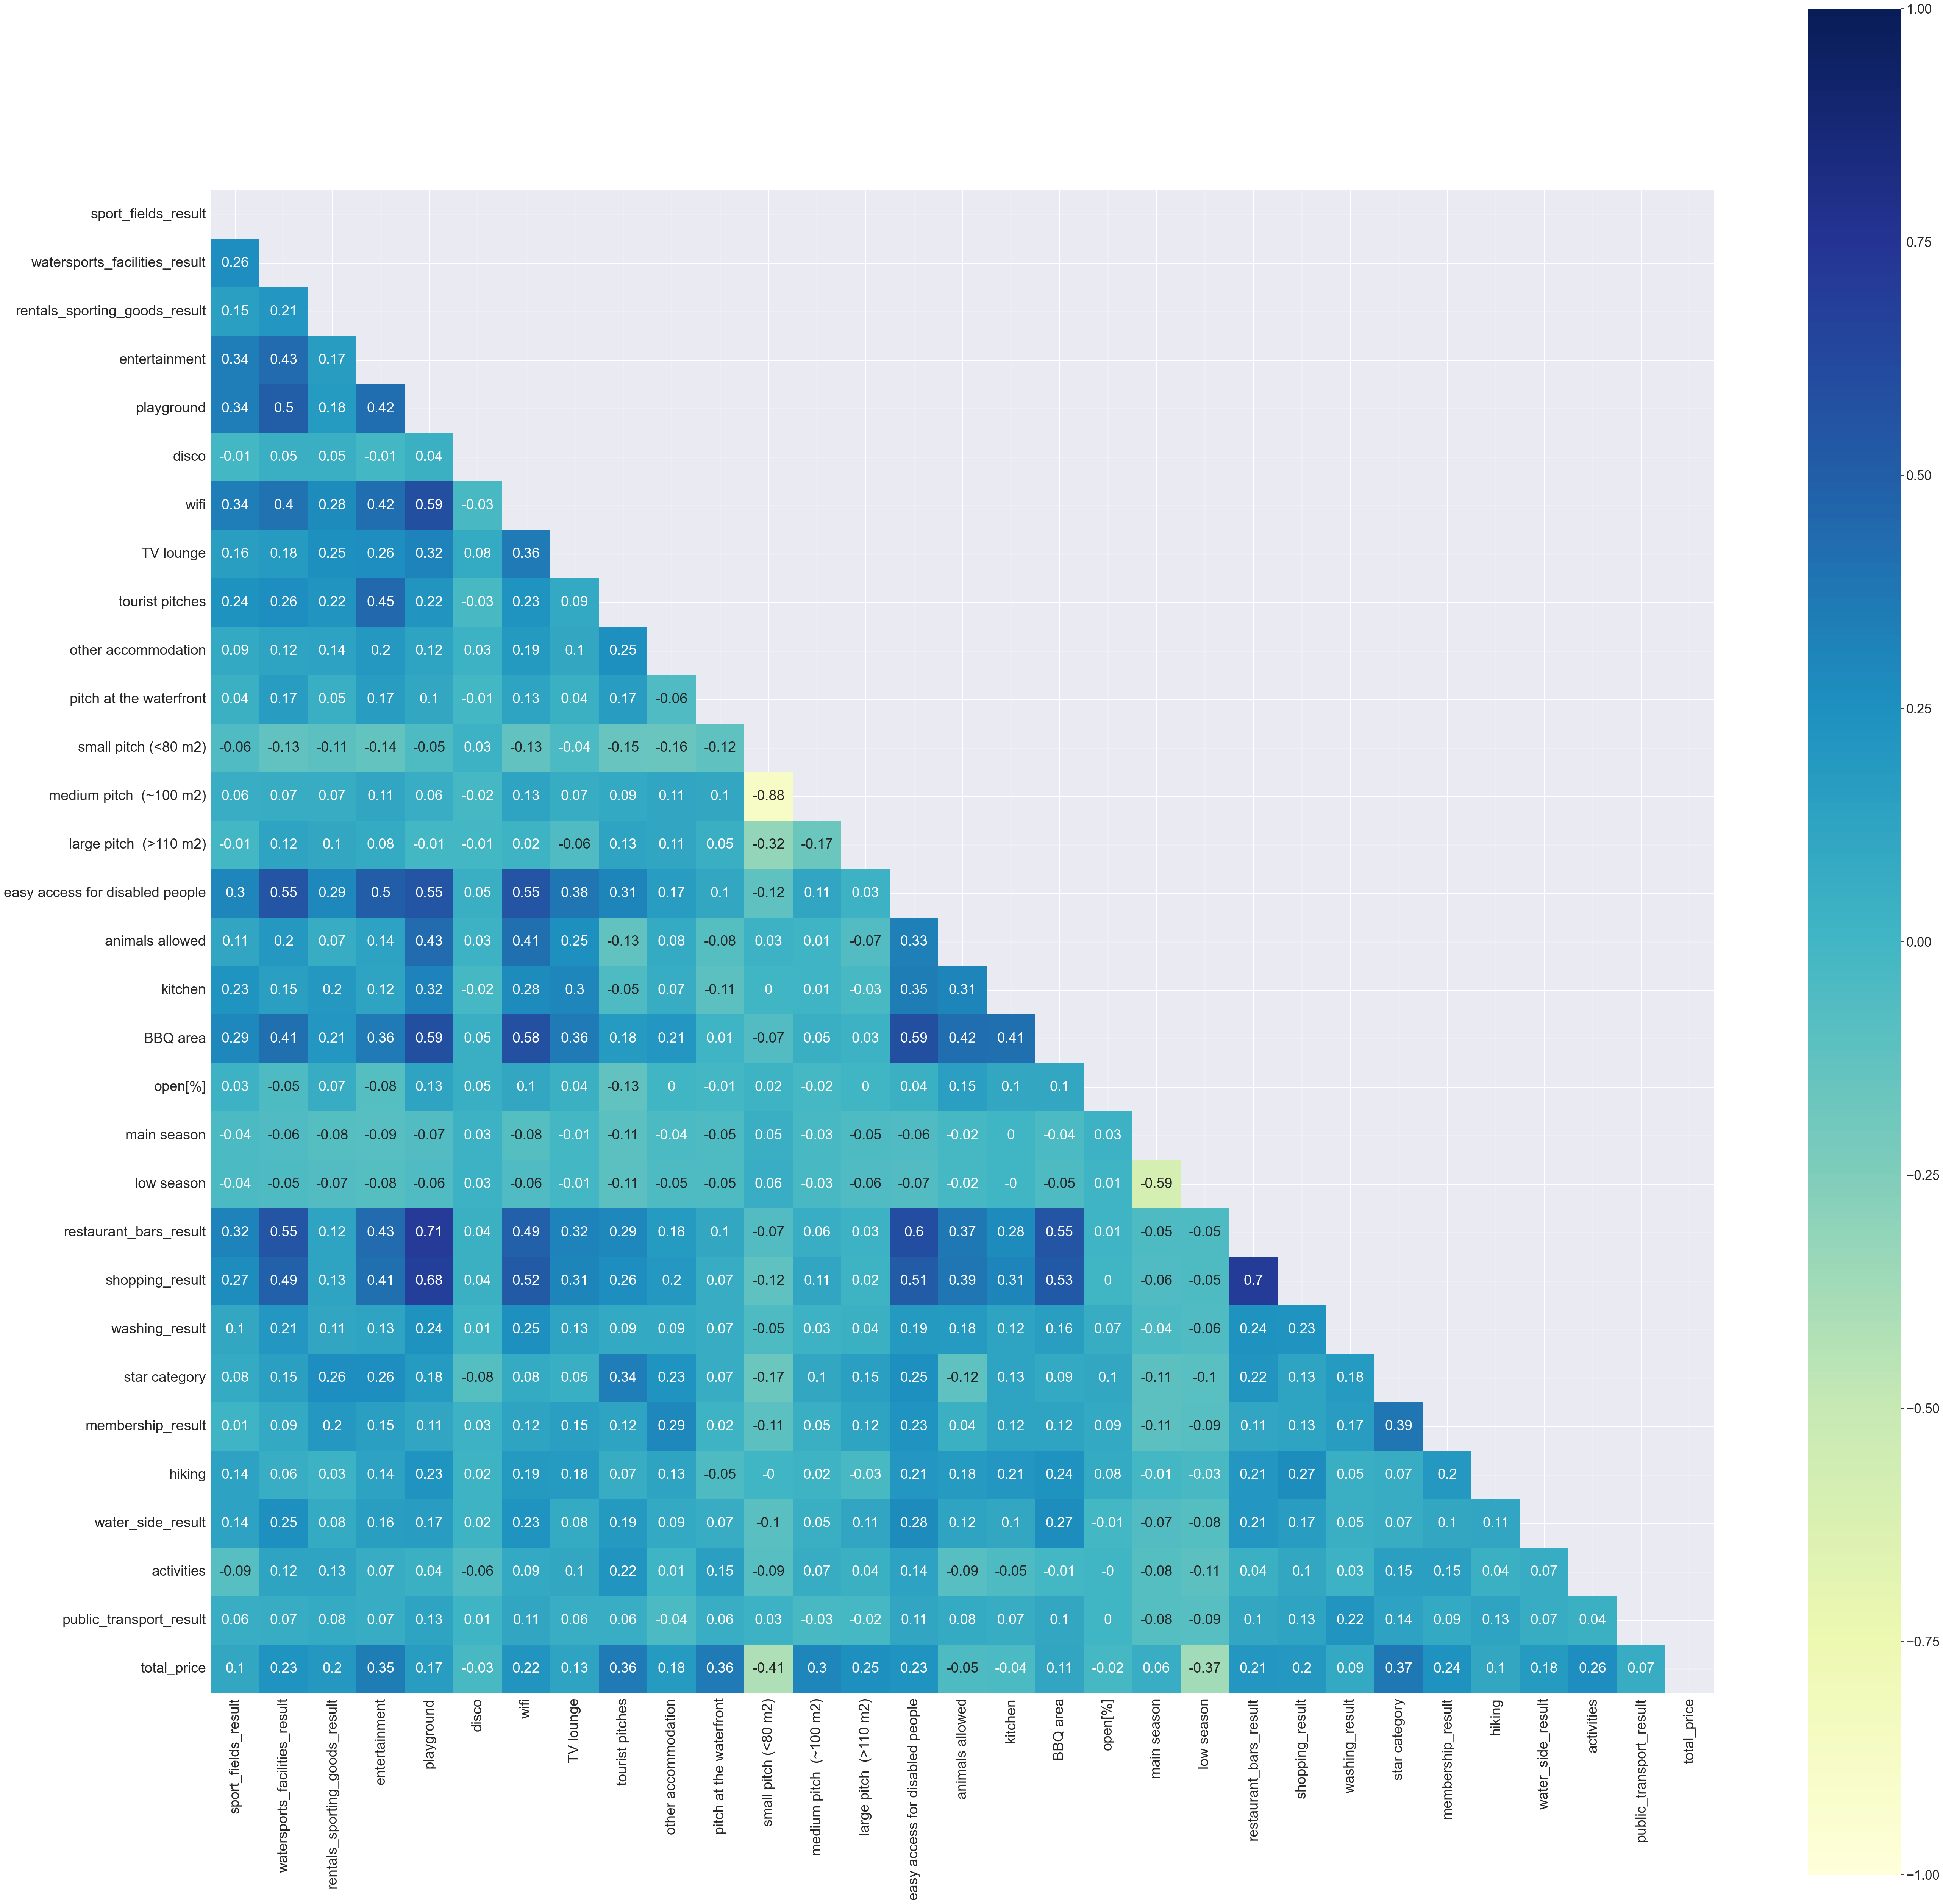

In [646]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
mask = np.zeros_like(df_correlation.corr())
mask[np.triu_indices_from(mask)] = True


# Heatmap zur Visualisierung der Korrelationen
plt.figure(figsize=(64, 64))
heatmap = sns.heatmap(df_correlation.corr().round(2), square=True, cmap='YlGnBu', vmin=-1, vmax=1, annot=True, annot_kws={'size': 27}, mask=mask)

# Schrift der Achsenbeschriftungen vergrössern
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=27)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=27)

# Schrift der Legende vergrössern
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=25)


plt.show()

## Statistiken

In [605]:
df_camping_all.kurt(numeric_only=True)[2:]

sport_fields_result                  5.752431
watersports_facilities_result       -1.158393
rentals_sporting_goods_result       -1.627549
entertainment                        3.647850
playground                          -1.928591
disco                              806.000000
wifi                                -1.735230
TV lounge                            1.408465
tourist pitches                     18.178044
other accommodation                 -1.982553
pitch at the waterfront              5.752431
small pitch (<80 m2)                -1.729495
medium pitch  (~100 m2)             -1.377516
large pitch  (>110 m2)              12.668151
easy access for disabled people     -1.377516
animals allowed                     -1.947060
kitchen                              0.294436
BBQ area                            -1.729495
open[%]                             -1.084571
main season                         -1.687299
low season                          -1.762844
restaurant_bars_result            

In [606]:
df_camping_all[['large pitch  (>110 m2)','total_price', 'main season', 'low season']].describe()

large pitch  (>110 m2)  total_price  main season  low season
count              806.000000   806.000000   806.000000  806.000000
mean                 0.057072    38.606638     0.635236    0.619107
std                  0.232124    14.505226     0.481663    0.485908
min                  0.000000     9.500000     0.000000    0.000000
25%                  0.000000    29.325000     0.000000    0.000000
50%                  0.000000    35.330000     1.000000    1.000000
75%                  0.000000    44.750000     1.000000    1.000000
max                  1.000000   121.300000     1.000000    1.000000

Standardabweichung im Preis ist hoch

In [300]:
df_camping_all.groupby('small pitch (<80 m2)').total_price.mean()

small pitch (<80 m2)
0    46.238605
1    34.057683
Name: total_price, dtype: float64

In [301]:
df_camping_all.groupby('large pitch  (>110 m2)').total_price.mean()

large pitch  (>110 m2)
0    37.725618
1    53.162609
Name: total_price, dtype: float64

# Training


In [572]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


import numpy as np

### Standardisierung: Normalisieren des Dataframes
Z-Scores berechnen: für jede Zelle in jedem Spalteneintrag des DataFrames wird der Mittelwert dieser Spalte abgezogen und das Ergebnis dann durch die Standardabweichung dieser Spalte geteilt. Nach der Normalisierung befinden sich alle Werte der Spalten auf einer vergleichbaren Skala: Mittelwert von 0 und eine Standardabweichung von 1.

In [520]:
df_camping_normal =(df_correlation-df_correlation.mean())/df_correlation.std()

In [521]:
df_camping_normal.head()

sport_fields_result  watersports_facilities_result  \
0             -0.32246                       -0.64113   
1             -0.32246                       -0.64113   
2             -0.32246                       -0.64113   
3             -0.32246                       -0.64113   
4             -0.32246                       -0.64113   

   rentals_sporting_goods_result  entertainment  playground     disco  \
0                       1.351222      -0.365307    1.146499 -0.035223   
1                       1.351222      -0.365307    1.146499 -0.035223   
2                       1.351222      -0.365307    1.146499 -0.035223   
3                       1.351222      -0.365307    1.146499 -0.035223   
4                       1.351222      -0.365307    1.146499 -0.035223   

       wifi  TV lounge  tourist pitches  other accommodation  ...  \
0  1.291047   2.278936         -0.66472             0.927558  ...   
1  1.291047   2.278936         -0.66472             0.927558  ...   
2  1.291047   2.278936         -0.66472             0.927558  ...   
3  1.291047   2.278936         -0.66472             0.927558  ...   
4  1.291047   2.278936         -0.20726             0.927558  ...   

   restaurant_bars_result  shopping_result  washing_result  star category  \
0               -0.840684        -0.879982        0.415935      -0.860404   
1               -0.840684        -0.879982        0.415935      -0.860404   
2               -0.840684        -0.879982        0.415935      -0.860404   
3               -0.840684        -0.879982        0.415935      -0.860404   
4                1.188032        -0.879982        0.415935      -0.109065   

   membership_result  hiking  water_side_result  activities  \
0           0.735145  0.6066           0.535895    0.169797   
1           0.735145  0.6066           0.535895    0.169797   
2           0.735145  0.6066           0.535895    0.169797   
3           0.735145  0.6066           0.535895    0.169797   
4           0.735145  0.6066          -1.863723   -0.104464   

   public_transport_result  total_price  
0                 0.182461    -0.041822  
1                 0.182461     0.302881  
2                 0.182461     0.096059  
3                 0.182461     0.440763  
4                 0.182461    -0.110763  

[5 rows x 31 columns]

### Train-Test-Split

In [552]:
X = df_camping_normal.drop(['total_price'],axis = 1)
y = df_camping_normal['total_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [523]:
model_lin = LinearRegression()
model_lin = model_lin.fit(X_train, y_train)
y_test_pred = model_lin.predict(X_test)

print(f'R2 Kreuzvalidierung Training: {cross_val_score(model_lin, X_train, y_train, cv=4).mean()}')
print(f"MSE Kreuzvalidierung Training: {-cross_val_score(model_lin, X_train, y_train, cv=4, scoring='neg_mean_squared_error').mean()}")

# R2: wie gut erklären die unabhängigen Variablen die abhängigen Variablen -> hier: sehr schlecht
# MSE:  durchschnittliche quadratische Differenz zwischen den vorhergesagten und den tatsächlichen Werten -> hier: Vorhersage weit vom tatsächlichen Wert entfernt

R2 Kreuzvalidierung Training: -1.8000849486183329e+21
MSE Kreuzvalidierung Training: 1.9371369762218734e+21


In [524]:
mse_lr = mean_squared_error(y_test, y_test_pred)
print(f'MSE Testdaten: {mse_lr}')

# Modell schneidet auf Testdaten besser ab, als in Trainingsdaten ->

MSE Testdaten: 0.37067092219659087


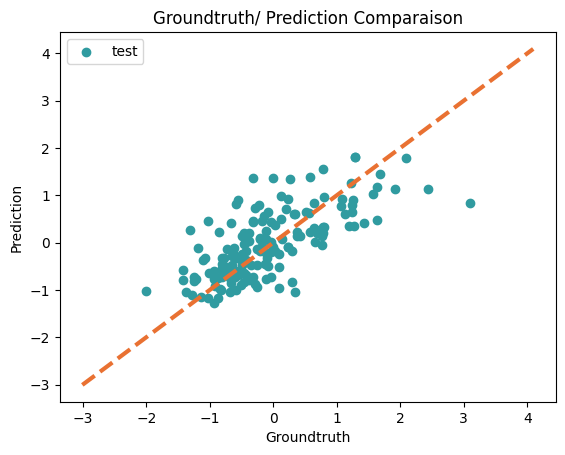

In [525]:
# Visualisieren der Testresultate
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='o', color='#309BA0', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='#E97132', ls='--') ## Trennlinie (x2=x1)

plt.xlabel('Measurement')
plt.ylabel('Prediction')
plt.title('Measurement/ Prediction Comparison LR')
plt.legend()
#plt.savefig('LR.png')

#Anhand dieses Diagramms können wir sehen, wie gut unser Modell funktioniert. Die orange Linie entspricht der Gleichung y=x. Punkte, die auf der Linie liegen, sind also perfekt vorhergesagt. Punkte, die weit von der Linie entfernt sind, stammen von einer schlechten Vorhersage.

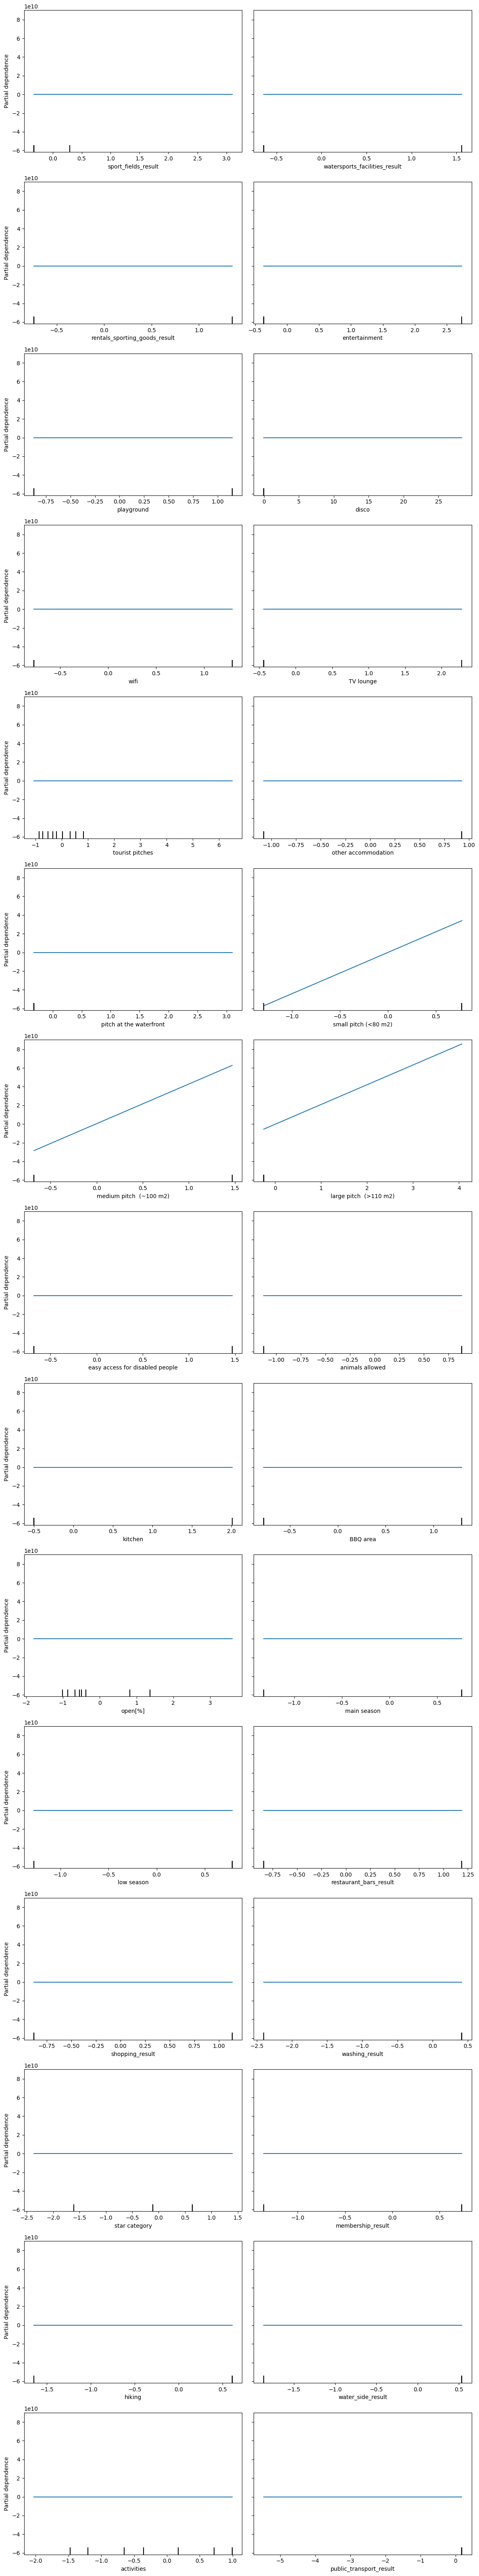

In [526]:
from sklearn.inspection import (partial_dependence, PartialDependenceDisplay)

n_cols = 2
n_rows = int(len(X_train.columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12,64))
PartialDependenceDisplay.from_estimator(model_lin, X_train, X_train.columns, ax=ax, n_cols=n_cols)
#fig.suptitle('Partial Dependence Plots')
fig.tight_layout()

### Random Forest

In [553]:
model_random = RandomForestRegressor(random_state= 42) #n_estimators=10,
model_random = model_random.fit(X_train, y_train)
y_test_pred = model_random.predict(X_test)

print(f'R2 Kreuzvalidierung Training: {cross_val_score(model_random, X_train, y_train, cv=4).mean()}')
print(f"MSE Kreuzvalidierung Training: {-cross_val_score(model_random, X_train, y_train, cv=4, scoring='neg_mean_squared_error').mean()}")

# R2: wie gut erklären die unabhängigen Variablen die abhängigen Variablen -> hier: moderat
# MSE:  durchschnittliche quadratische Differenz zwischen den vorhergesagten und den tatsächlichen Werten

R2 Kreuzvalidierung Training: 0.6095396544608961
MSE Kreuzvalidierung Training: 0.4070024075420054


In [554]:
mse_rf = mean_squared_error(y_test, y_test_pred)
print(f'MSE Testdaten: {mse_rf}')

# Modell schneidet auf Testdaten besser ab, als in Trainingsdaten -> gute Generalisierbarkeit und kein Overfitting auf die Trainingsdaten

MSE Testdaten: 0.3040738014472791


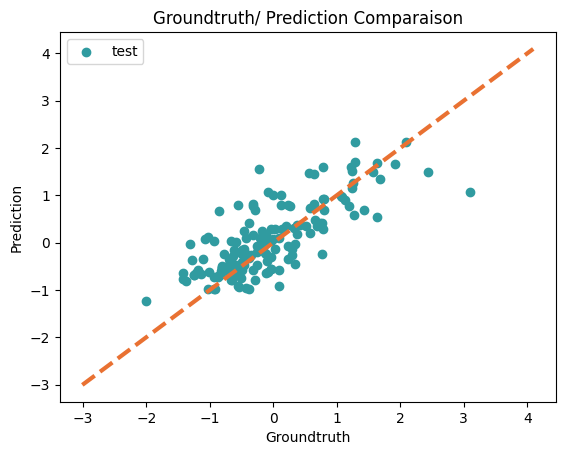

In [555]:
# Visualisieren der Testresultate
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='o', color='#309BA0', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='#E97132', ls='--') ## Trennlinie (x2=x1)

plt.xlabel('Measurement')
plt.ylabel('Prediction')
plt.title('Measurement/ Prediction Comparison RF')
plt.legend()
#plt.savefig('RF.png')

#Anhand dieses Diagramms können wir sehen, wie gut unser Modell funktioniert. Die oragne Linie entspricht der Gleichung y=x. Punkte, die auf der Linie liegen, sind also perfekt vorhergesagt. Punkte, die weit von der Linie entfernt sind, stammen von einer schlechten Vorhersage.


In [556]:
feature_importances = model_random.feature_importances_
print('Feature Importance:', feature_importances)

Feature Importance: [1.47911406e-02 1.16519479e-02 1.36431033e-02 6.07653982e-02
 4.67296682e-03 1.74620602e-06 5.00044925e-03 1.44807767e-02
 2.02974532e-01 2.74506683e-02 6.69620055e-02 1.08547249e-01
 1.25592092e-02 1.62762969e-02 4.00147934e-03 1.14699178e-02
 6.34455618e-03 9.84757404e-03 6.85530777e-02 1.43942806e-02
 1.12725069e-01 5.91803210e-03 3.77764791e-03 1.08123957e-02
 1.12536846e-01 1.38953120e-02 1.28246567e-02 5.01506133e-03
 4.57176710e-02 2.38893218e-03]


In [557]:
feature_names = ['sport_fields_result', 'watersports_facilities_result', 'rentals_sporting_goods_result', 'entertainment', 'playground', 'disco', 'wifi', 'TV lounge', 'tourist pitches', 'other accommodation', 'pitch at the waterfront','small pitch (<80 m2)', 'medium pitch  (~100 m2)', 'large pitch  (>110 m2)', 'easy access for disabled people', 'animals allowed', 'kitchen', 'BBQ area', 'open[%]', 'main season', 'low season', 'restaurant_bars_result', 'shopping_result', 'washing_result', 'star category', 'membership_result', 'hiking', 'water_side_result', 'activities', 'public_transport_result']

# Kombiniere Feature-Namen mit deren Wichtigkeiten
feature_importance_with_names = list(zip(feature_names, feature_importances))

# Sortiere nach Wichtigkeit absteigend
feature_importance_with_names_sorted = sorted(feature_importance_with_names, key=lambda x: x[1], reverse=True)

# Ausgabe der sortierten Feature-Importance mit Feature-Namen
for feature, importance in feature_importance_with_names_sorted:
    print(f"{feature}: {importance}")

tourist pitches: 0.20297453215739433
low season: 0.11272506924870931
star category: 0.11253684568438724
small pitch (<80 m2): 0.10854724938288828
open[%]: 0.0685530776776482
pitch at the waterfront: 0.06696200554450606
entertainment: 0.06076539819489798
activities: 0.04571767102327638
other accommodation: 0.02745066834074843
large pitch  (>110 m2): 0.01627629686360638
sport_fields_result: 0.014791140628491213
TV lounge: 0.014480776665838581
main season: 0.014394280593989806
membership_result: 0.013895312040641972
rentals_sporting_goods_result: 0.013643103325357696
hiking: 0.01282465665605715
medium pitch  (~100 m2): 0.012559209240254417
watersports_facilities_result: 0.011651947898514274
animals allowed: 0.011469917778969616
washing_result: 0.010812395713144372
BBQ area: 0.009847574035535706
kitchen: 0.006344556182886507
restaurant_bars_result: 0.0059180320994463645
water_side_result: 0.005015061325827561
wifi: 0.005000449245072843
playground: 0.0046729668162738
easy access for disable

Text(0, 0.5, 'total price')

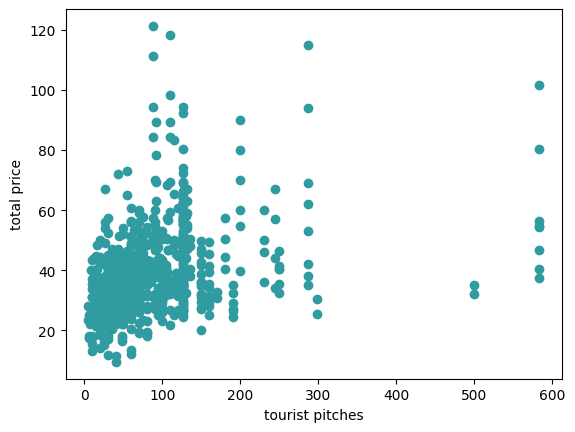

In [558]:
fig = plt.figure(1)
plt.scatter(df_correlation['tourist pitches'],df_correlation['total_price'], marker='o', color='#309BA0')
plt.xlabel('tourist pitches')
plt.ylabel('total price')

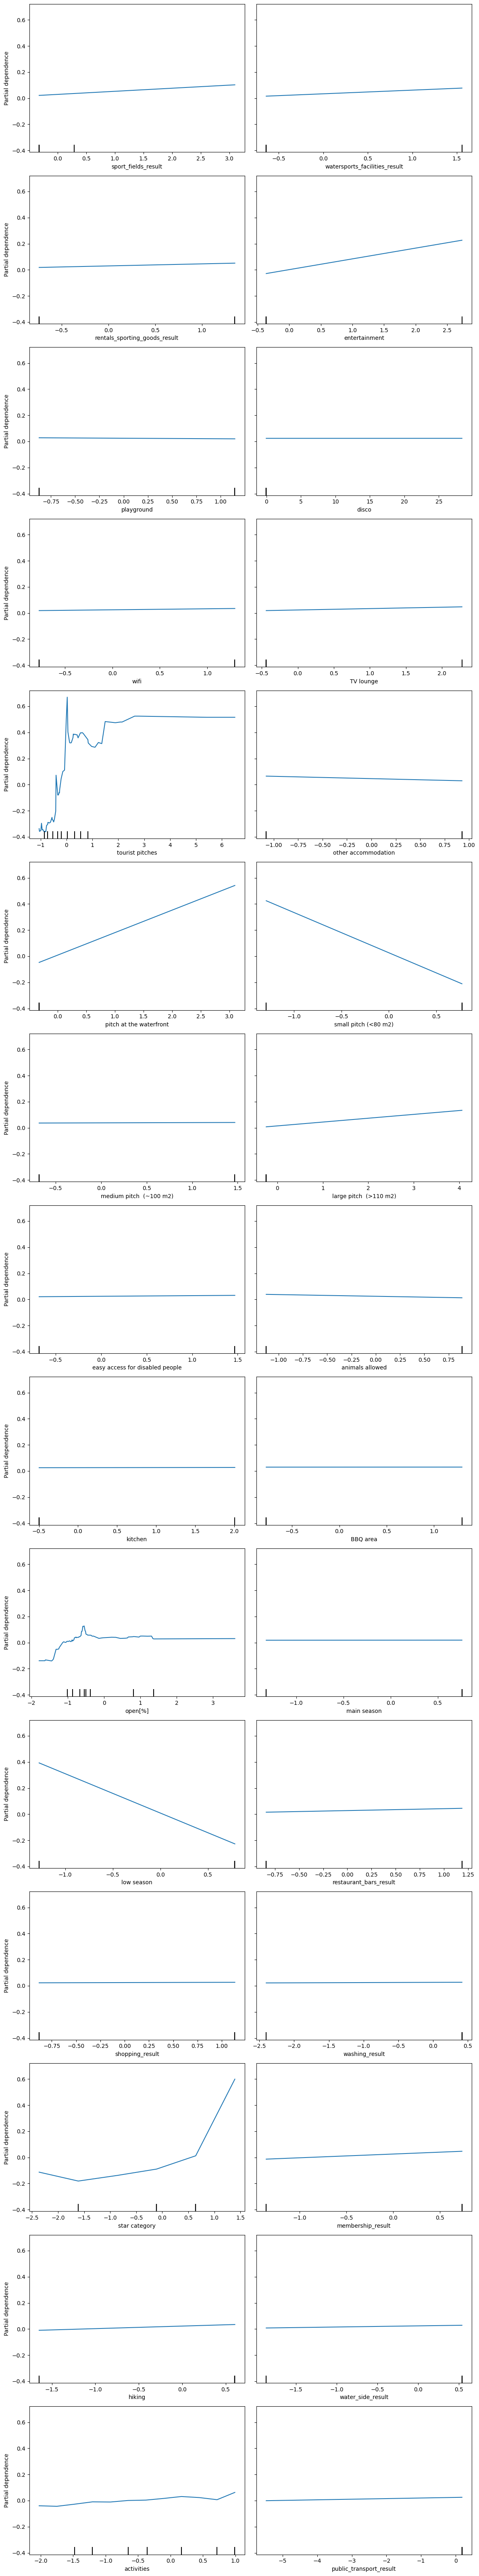

In [571]:
n_cols = 2
n_rows = int(len(X_train.columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12,64))
PartialDependenceDisplay.from_estimator(model_random, X_train, X_train.columns, ax=ax, n_cols=n_cols)
#fig.suptitle('Partial Dependence Plots')
fig.tight_layout()

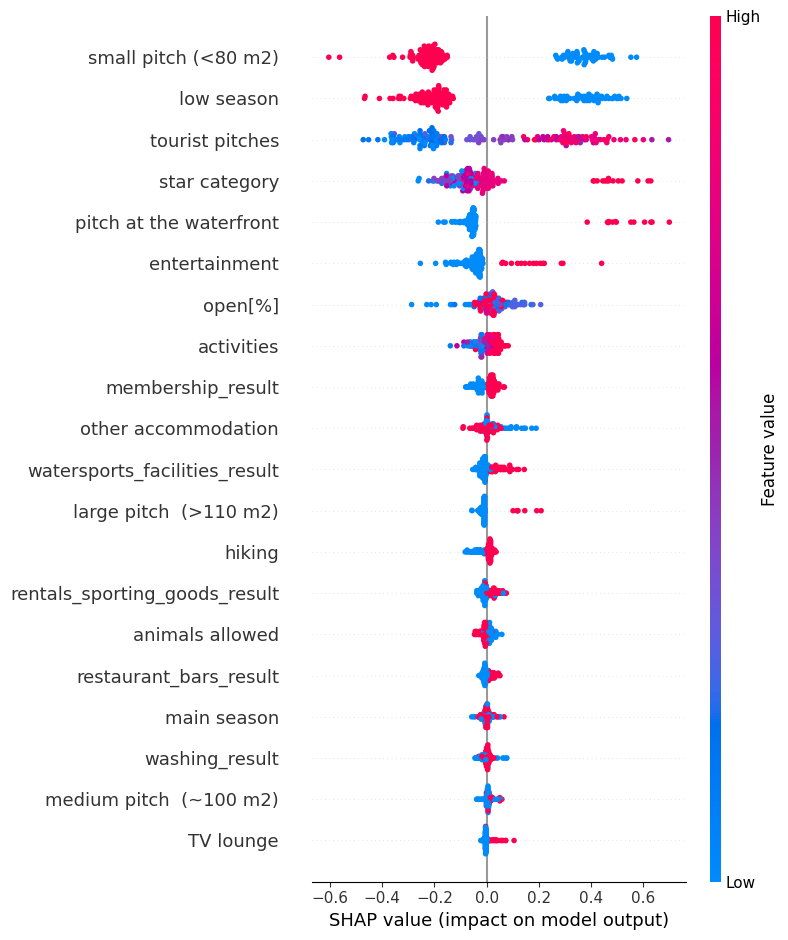

In [559]:
import shap
explainer = shap.Explainer(model_random)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

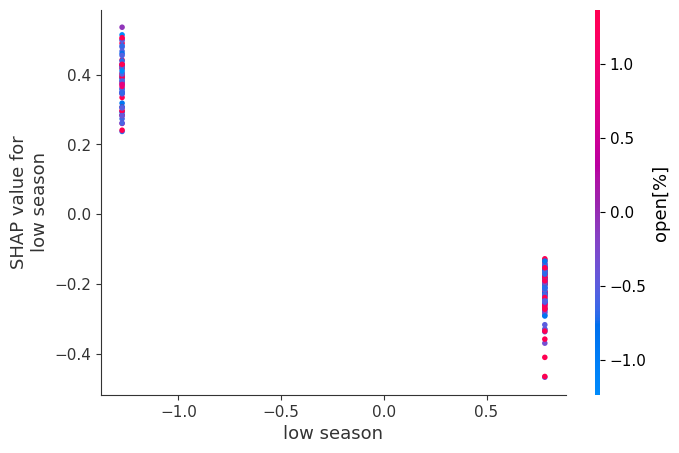

In [570]:
#shap.dependence_plot('main season', shap_values.values, X_test, feature_names=X_test.columns)
shap.dependence_plot('low season', shap_values.values, X_test, interaction_index='open[%]')

## Gradient Boosting Regressor

In [647]:
model_gradient = GradientBoostingRegressor(random_state= 42)
model_gradient = model_gradient.fit(X_train, y_train)
y_test_pred = model_gradient.predict(X_test)
print(f'R2 Kreuzvalidierung Training: {cross_val_score(model_gradient, X_train, y_train, cv=4).mean()}')
print(f"MSE Kreuzvalidierung Training: {-cross_val_score(model_gradient, X_train, y_train, cv=4, scoring='neg_mean_squared_error').mean()}")

R2 Kreuzvalidierung Training: 0.6735696807326136
MSE Kreuzvalidierung Training: 0.3387163169457132


In [648]:
mse_gr = mean_squared_error(y_test, y_test_pred)
print(f'MSE Testdaten: {mse_gr}')

MSE Testdaten: 0.26874688572878586


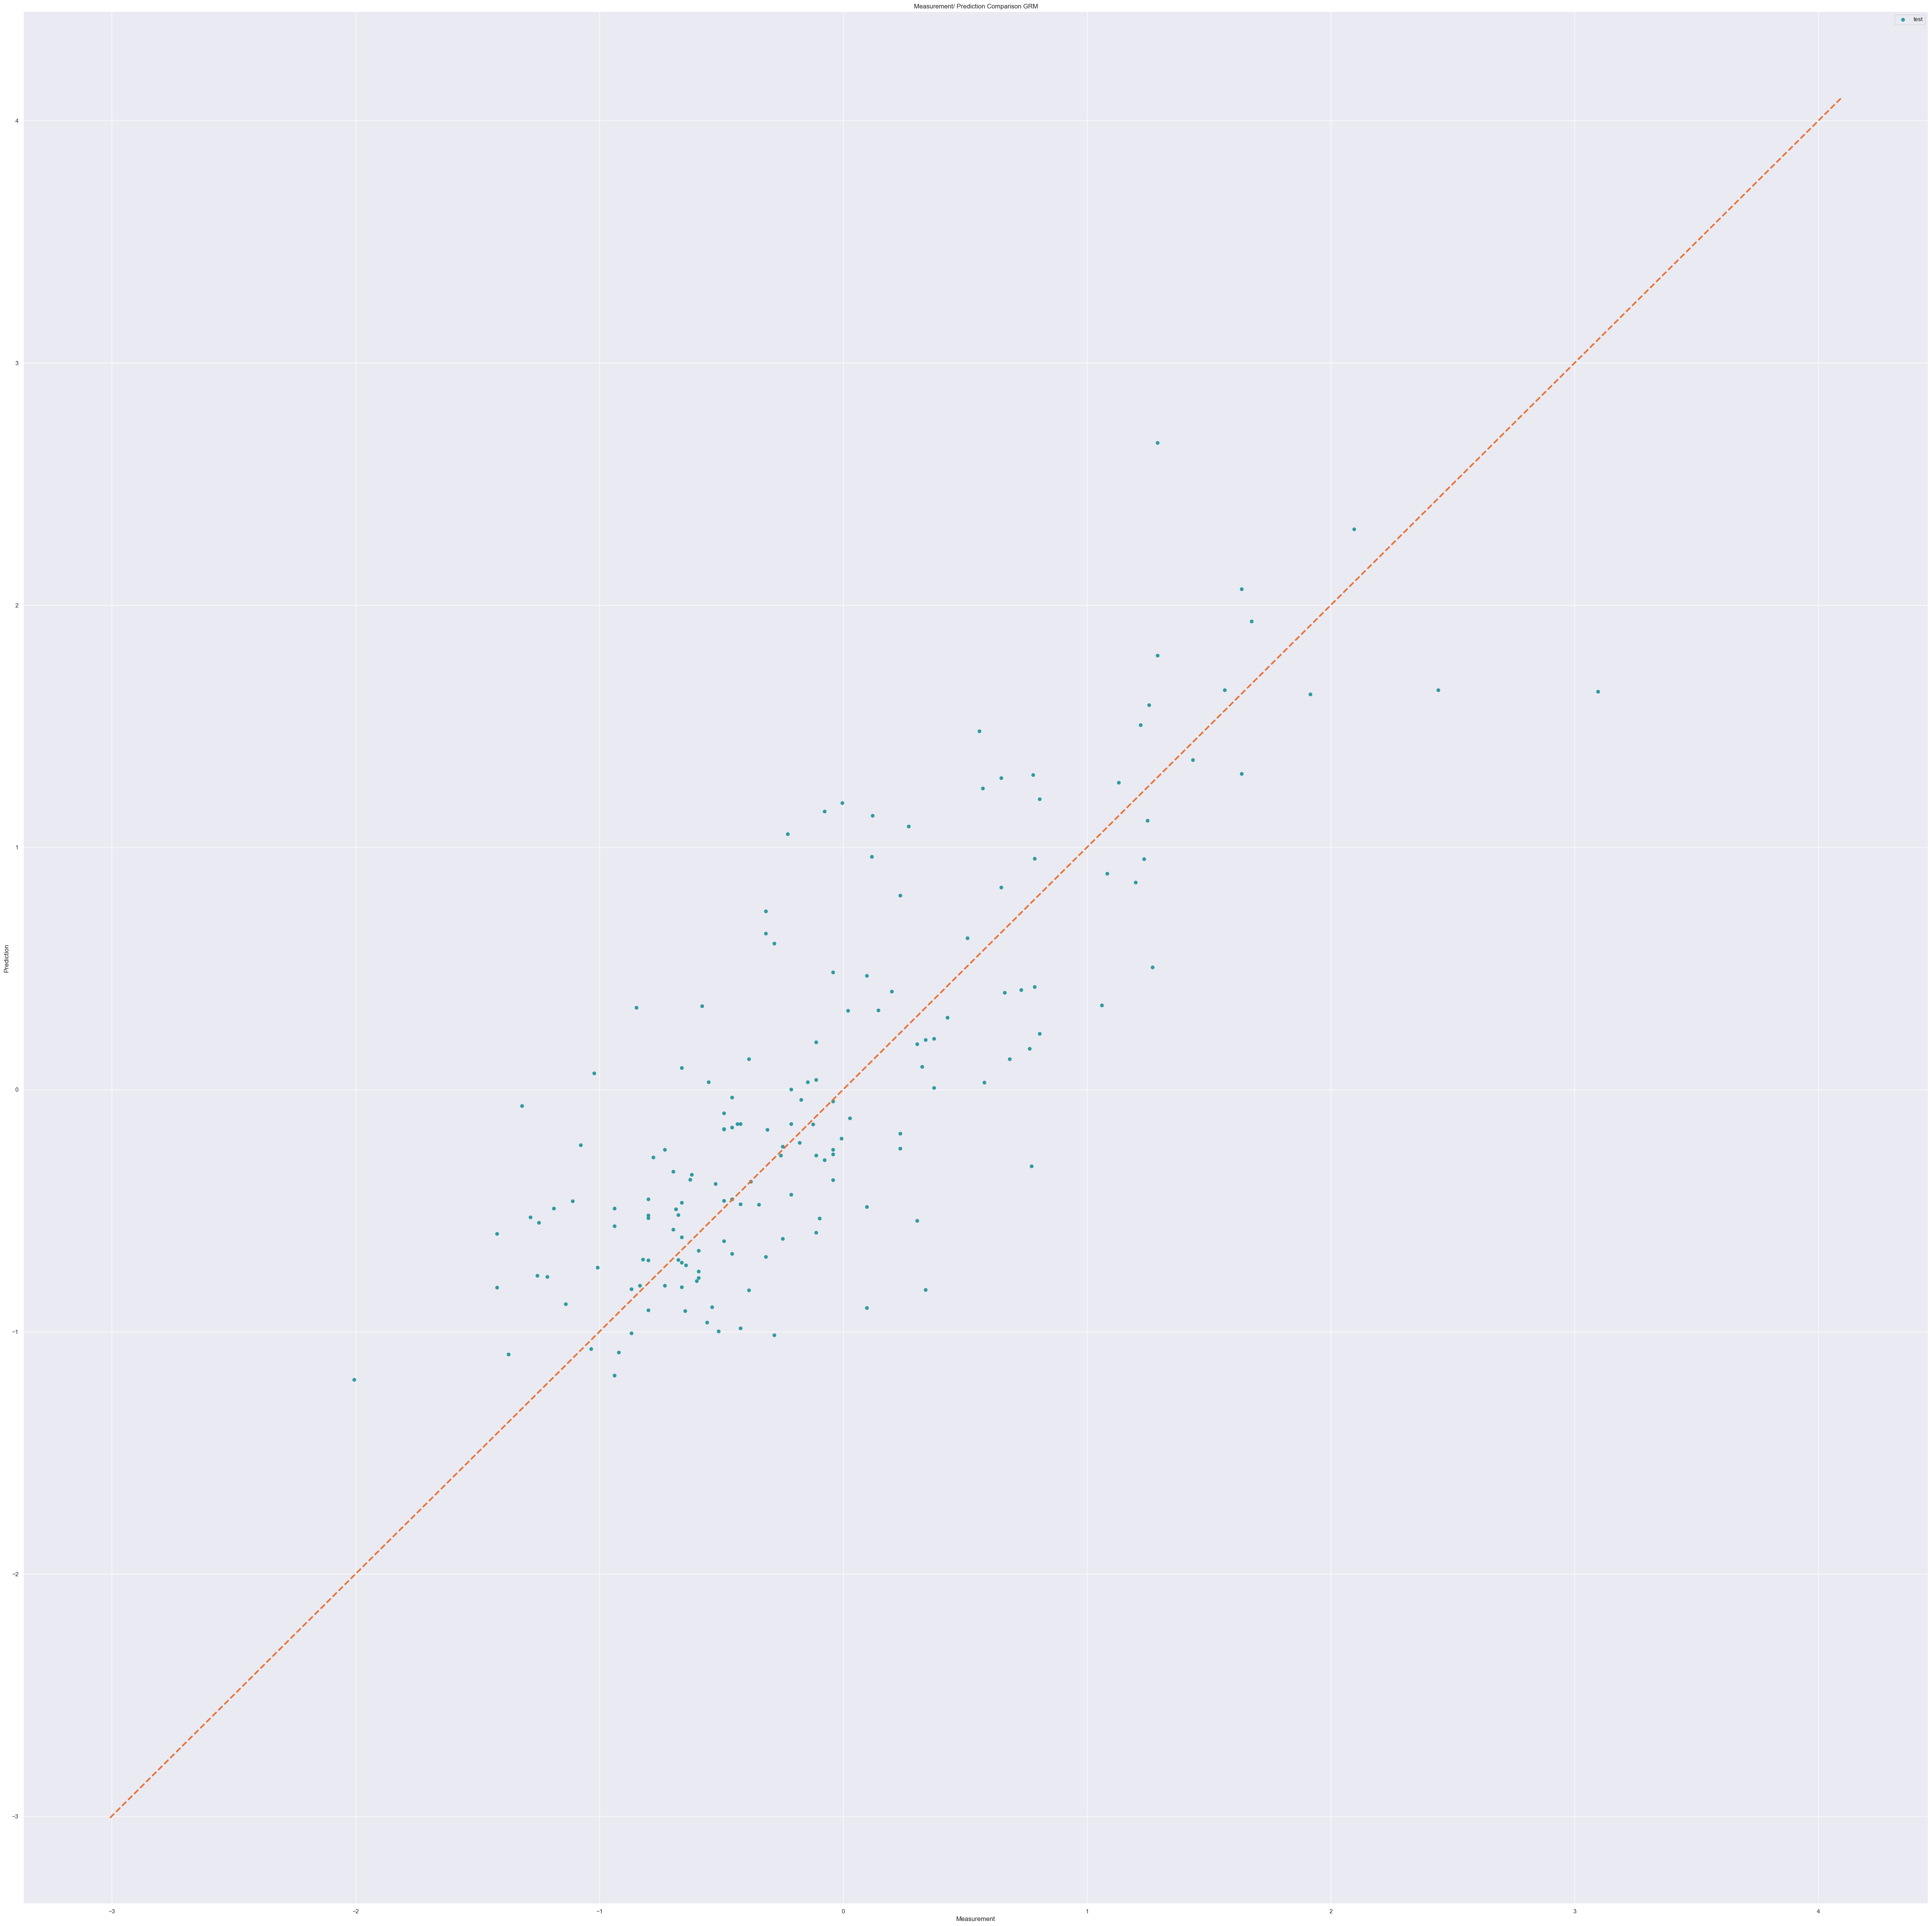

In [649]:
# Visualisieren der Testresultate
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='o', color='#309BA0', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='#E97132', ls='--') ## Trennlinie (x2=x1)

plt.xlabel('Measurement')
plt.ylabel('Prediction')
plt.title('Measurement/ Prediction Comparison GRM')
plt.legend()
#plt.savefig('GB.png')

#Anhand dieses Diagramms können wir sehen, wie gut unser Modell funktioniert. Die oragne Linie entspricht der Gleichung y=x. Punkte, die auf der Linie liegen, sind also perfekt vorhergesagt. Punkte, die weit von der Linie entfernt sind, stammen von einer schlechten Vorhersage.

In [538]:
feature_importances = model_gradient.feature_importances_

feature_names = ['sport_fields_result', 'watersports_facilities_result', 'rentals_sporting_goods_result', 'entertainment', 'playground', 'disco', 'wifi', 'TV lounge', 'tourist pitches', 'other accommodation', 'pitch at the waterfront','small pitch (<80 m2)', 'medium pitch  (~100 m2)', 'large pitch  (>110 m2)', 'easy access for disabled people', 'animals allowed', 'kitchen', 'BBQ area', 'open[%]', 'main season', 'low season', 'restaurant_bars_result', 'shopping_result', 'washing_result', 'star category', 'membership_result', 'hiking', 'water_side_result', 'activities', 'public_transport_result']

# Kombiniere Feature-Namen mit deren Wichtigkeiten
feature_importance_with_names = list(zip(feature_names, feature_importances))

# Sortiere nach Wichtigkeit absteigend
feature_importance_with_names_sorted = sorted(feature_importance_with_names, key=lambda x: x[1], reverse=True)

# Ausgabe der sortierten Feature-Importance mit Feature-Namen
for feature, importance in feature_importance_with_names_sorted:
    print(f"{feature}: {importance}")

tourist pitches: 0.19347340064071275
star category: 0.1464880988230348
low season: 0.1407577556159967
small pitch (<80 m2): 0.13333099542767626
pitch at the waterfront: 0.09871498100948511
open[%]: 0.06056772087805461
entertainment: 0.05968076597382076
activities: 0.021087645578296215
rentals_sporting_goods_result: 0.020874081076159685
sport_fields_result: 0.015935998494445516
large pitch  (>110 m2): 0.013808874040521432
membership_result: 0.011787569129675442
other accommodation: 0.011577310082025727
BBQ area: 0.01127677728434851
washing_result: 0.00870916944573916
animals allowed: 0.008179791453981922
hiking: 0.007900097792342237
kitchen: 0.0062770831559258505
watersports_facilities_result: 0.005455258793794971
wifi: 0.005337878731733335
medium pitch  (~100 m2): 0.004473493847803767
water_side_result: 0.004331002089153629
main season: 0.0032691299654479247
restaurant_bars_result: 0.0027299373343412504
public_transport_result: 0.0018675291625019357
TV lounge: 0.0009785126875591788
pla

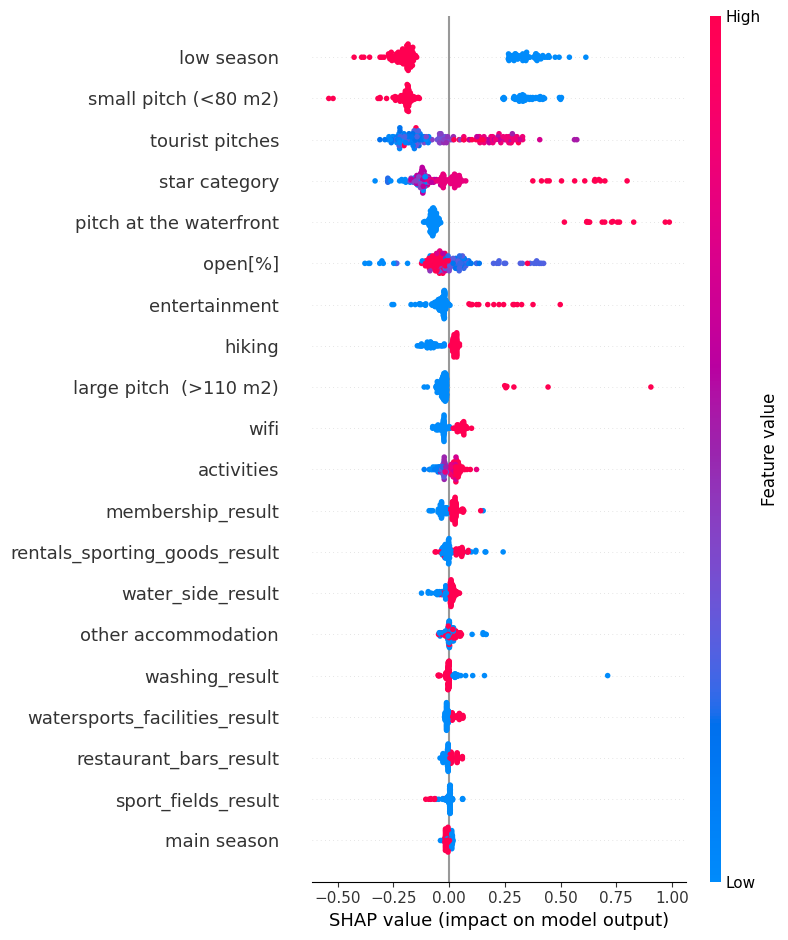

In [539]:
import shap
explainer = shap.Explainer(model_gradient)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

### Gradient Boost (XGBoost)

In [641]:
model_xgb = XGBRegressor()
model_xgb = model_xgb.fit(X_train.values, y_train.values)
y_test_pred = model_xgb.predict(X_test.values)
print(f'R2 Kreuzvalidierung Training: {cross_val_score(model_xgb, X_train.values, y_train.values, cv=4).mean()}')
print(f"MSE Kreuzvalidierung Training: {-cross_val_score(model_xgb, X_train.values, y_train.values, cv=4, scoring='neg_mean_squared_error').mean()}")
mse_grXG = mean_squared_error(y_test, y_test_pred)
print(f'MSE Testdaten: {mse_grXG}')

R2 Kreuzvalidierung Training: 0.6619572283189352
MSE Kreuzvalidierung Training: 0.3471071631331998
MSE Testdaten: 0.22511099523747954


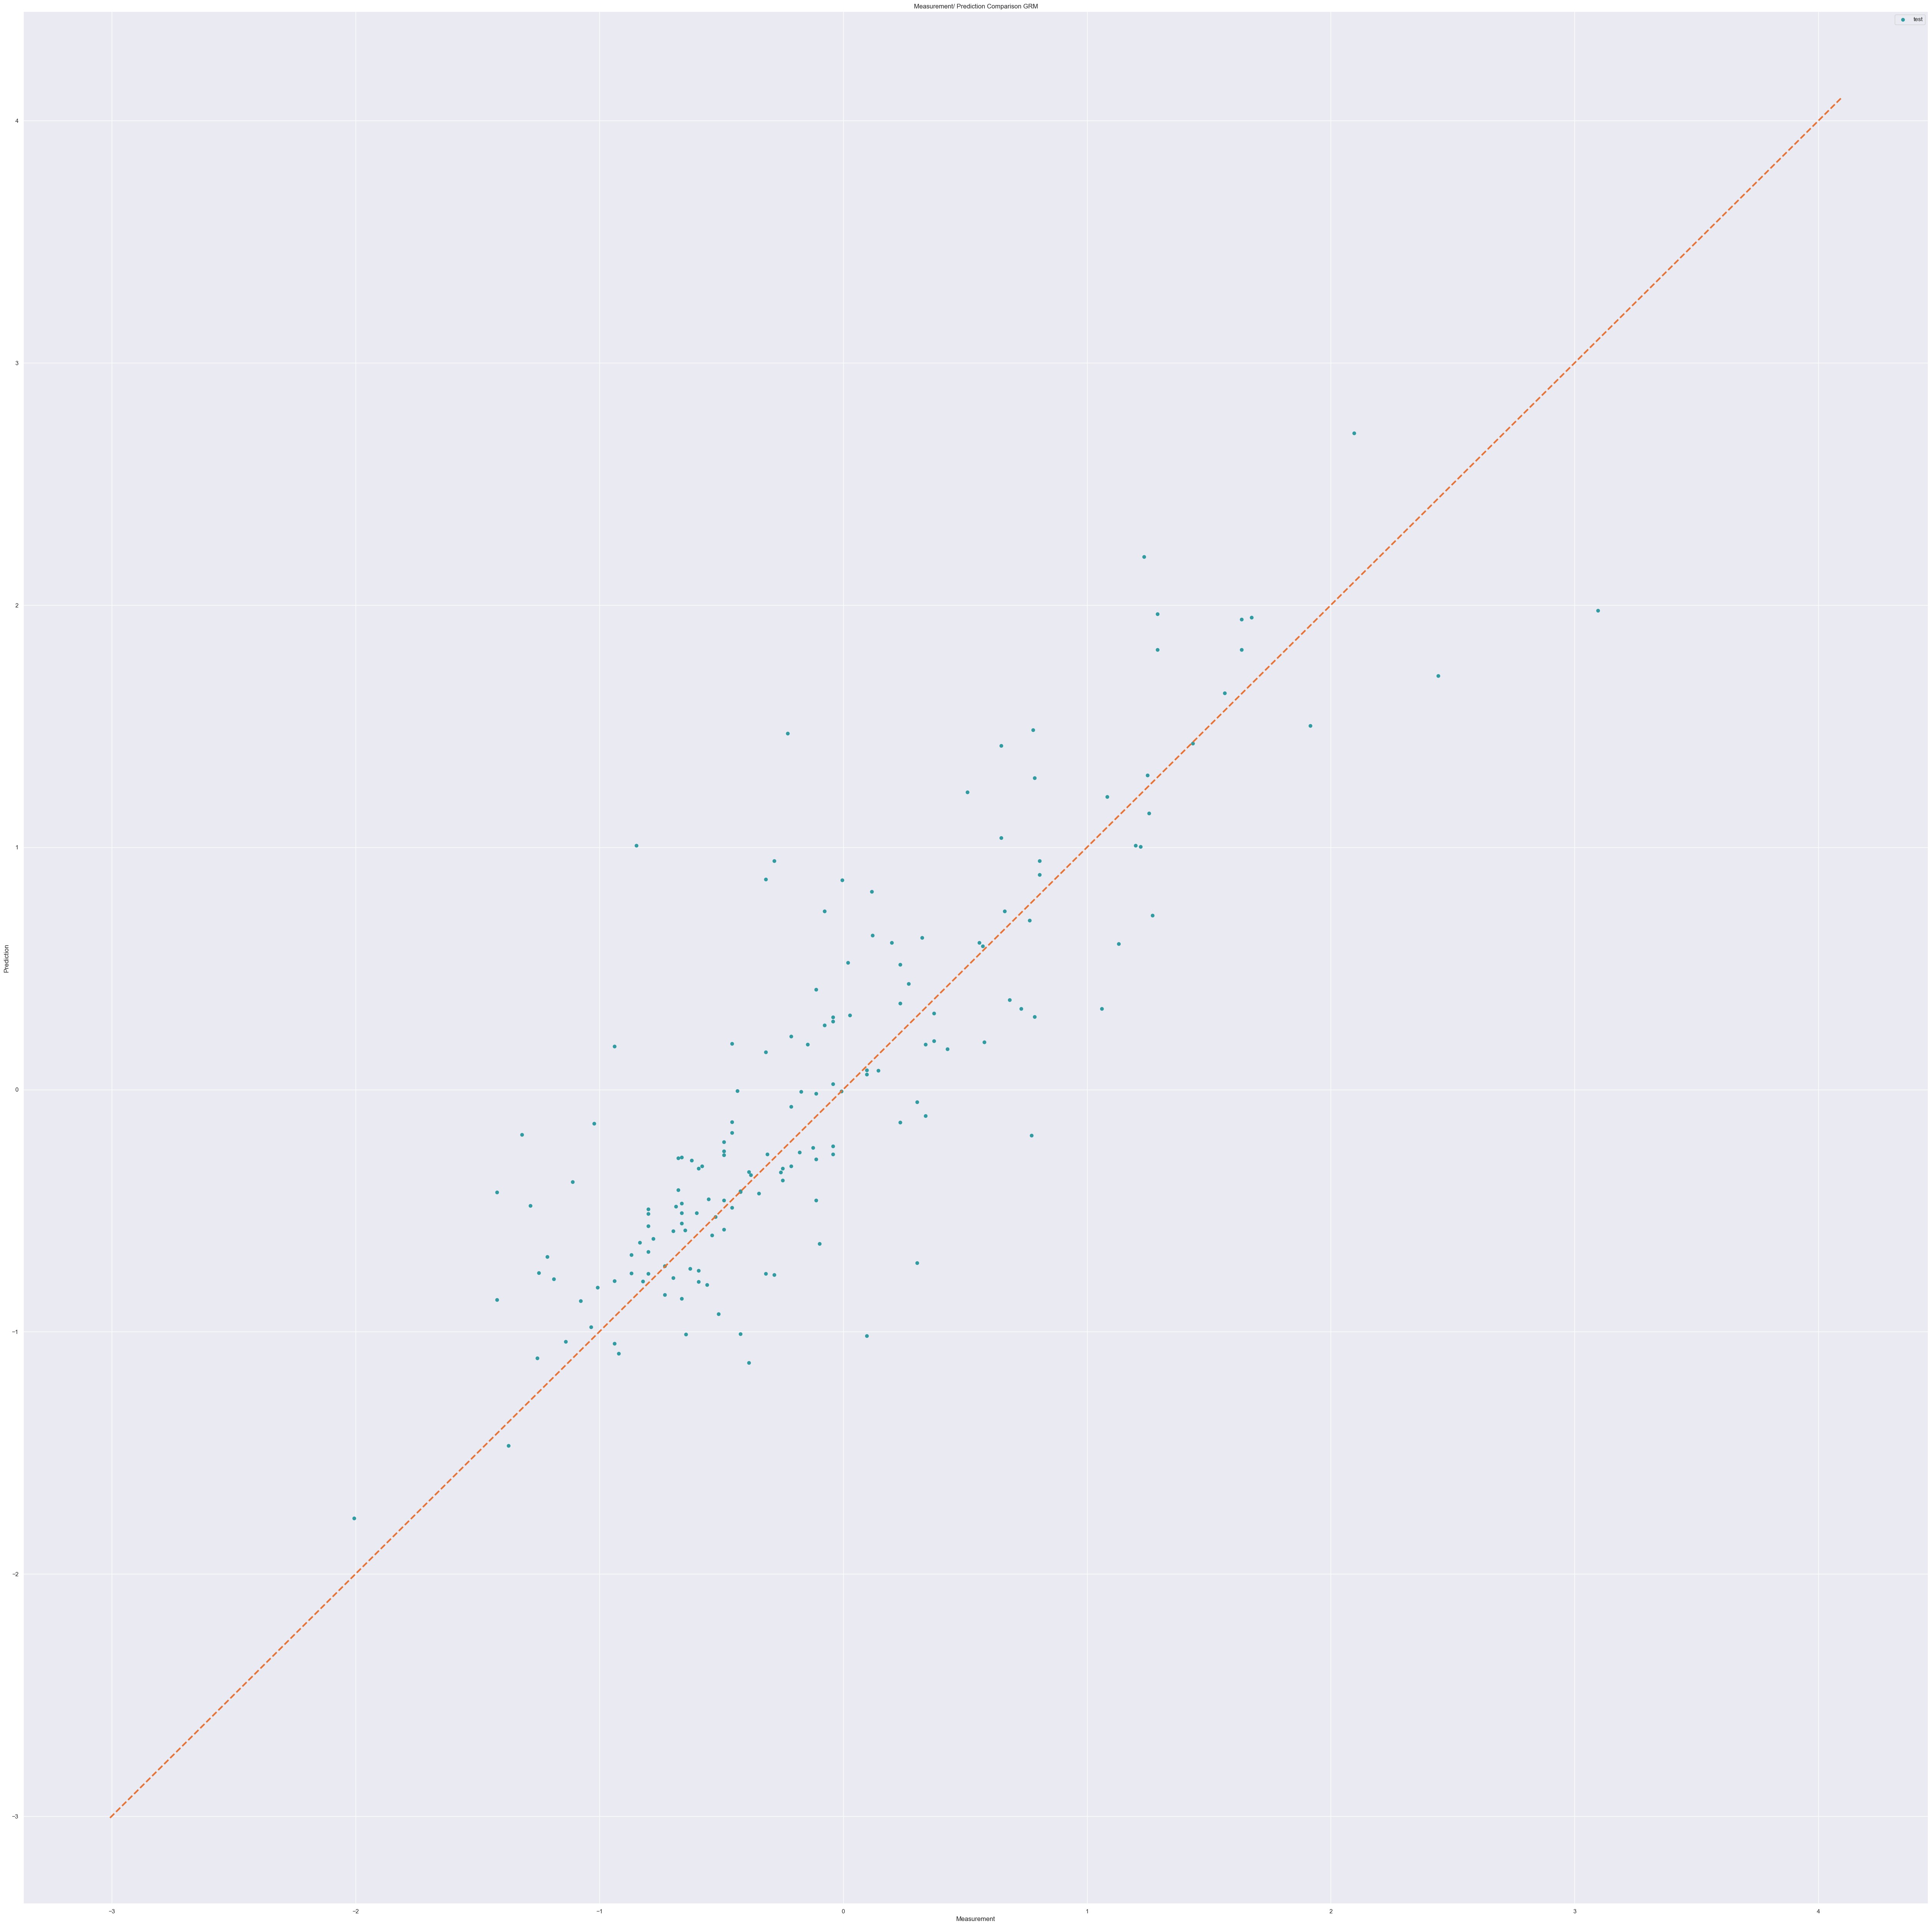

In [642]:
# Visualisieren der Testresultate
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='o', color='#309BA0', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='#E97132', ls='--') ## Trennlinie (x2=x1)

plt.xlabel('Measurement')
plt.ylabel('Prediction')
plt.title('Measurement/ Prediction Comparison GRM')
plt.legend()
#plt.savefig('XGB.png')

#Anhand dieses Diagramms können wir sehen, wie gut unser Modell funktioniert. Die oragne Linie entspricht der Gleichung y=x. Punkte, die auf der Linie liegen, sind also perfekt vorhergesagt. Punkte, die weit von der Linie entfernt sind, stammen von einer schlechten Vorhersage.

In [594]:
feature_importances = model_xgb.feature_importances_

feature_names = ['sport_fields_result', 'watersports_facilities_result', 'rentals_sporting_goods_result', 'entertainment', 'playground', 'disco', 'wifi', 'TV lounge', 'tourist pitches', 'other accommodation', 'pitch at the waterfront','small pitch (<80 m2)', 'medium pitch  (~100 m2)', 'large pitch  (>110 m2)', 'easy access for disabled people', 'animals allowed', 'kitchen', 'BBQ area', 'open[%]', 'main season', 'low season', 'restaurant_bars_result', 'shopping_result', 'washing_result', 'star category', 'membership_result', 'hiking', 'water_side_result', 'activities', 'public_transport_result']

# Kombiniere Feature-Namen mit deren Wichtigkeiten
feature_importance_with_names = list(zip(feature_names, feature_importances))

# Sortiere nach Wichtigkeit absteigend
feature_importance_with_names_sorted = sorted(feature_importance_with_names, key=lambda x: x[1], reverse=True)

# Ausgabe der sortierten Feature-Importance mit Feature-Namen
for feature, importance in feature_importance_with_names_sorted:
    print(f"{feature}: {importance}")

entertainment: 0.16641277074813843
low season: 0.10749509930610657
star category: 0.10400736331939697
small pitch (<80 m2): 0.08769094944000244
tourist pitches: 0.05465400591492653
pitch at the waterfront: 0.051305051892995834
sport_fields_result: 0.03550422936677933
other accommodation: 0.03543809801340103
kitchen: 0.0301860049366951
membership_result: 0.02964235469698906
large pitch  (>110 m2): 0.027014529332518578
open[%]: 0.026525016874074936
activities: 0.022349972277879715
rentals_sporting_goods_result: 0.021449794992804527
washing_result: 0.019807370379567146
hiking: 0.019395967945456505
TV lounge: 0.019294939935207367
watersports_facilities_result: 0.01851026713848114
medium pitch  (~100 m2): 0.017709260806441307
restaurant_bars_result: 0.017531700432300568
animals allowed: 0.014228204265236855
public_transport_result: 0.012426610104739666
water_side_result: 0.011810745112597942
shopping_result: 0.011205576360225677
BBQ area: 0.009062393568456173
playground: 0.00758637255057692

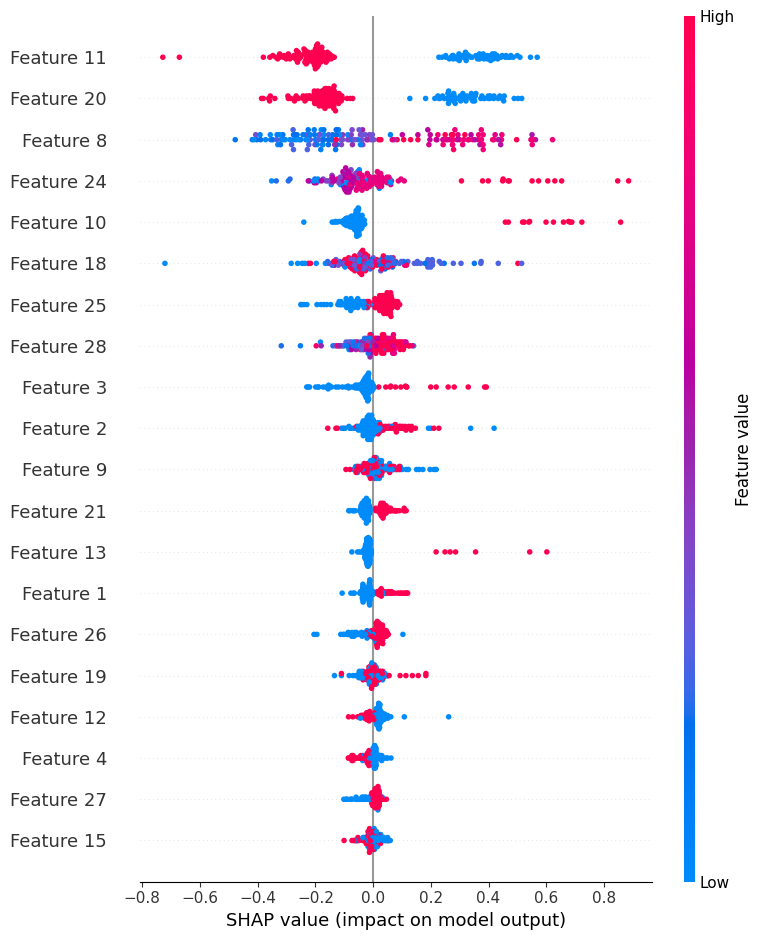

In [596]:
explainer = shap.Explainer(model_xgb)
shap_values = explainer(X_test.values)
shap.summary_plot(shap_values, X_test.values)

### Gradient Boost (GBLight)

In [581]:
model_lgbm  = LGBMRegressor()
model_lgbm = model_lgbm .fit(X_train.values, y_train.values)
y_test_pred = model_lgbm .predict(X_test.values)
print(f'R2 Kreuzvalidierung Training: {cross_val_score(model_lgbm , X_train.values, y_train.values, cv=4).mean()}')
print(f"MSE Kreuzvalidierung Training: {-cross_val_score(model_lgbm , X_train.values, y_train.values, cv=4, scoring='neg_mean_squared_error').mean()}")
mse_grLG = mean_squared_error(y_test, y_test_pred)
print(f'MSE Testdaten: {mse_grLG}')

# Bedeutung Warnung: der Algorithmus kann keine weiteren sinnvollen Splits für die Entscheidungsbäume finden konnte. Gründe: z.B. zu wenig Daten, nicht ausreichende Varianz in den Daten oder zu geringe Komplexität der Modelleinstellungen.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 644, number of used features: 29
[LightGBM] [Info] Start training from score 0.023618
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

### Ergebnisübersicht

In [591]:
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosted Regressor', 'XGBoost', 'LightBoost',],
    'R2 Kreuzvalidierung Training': [
        cross_val_score(model_lin, X_train, y_train, cv=4).mean(),
        cross_val_score(model_random, X_train, y_train, cv=4).mean(),
        cross_val_score(model_gradient, X_train, y_train, cv=4).mean(),
        cross_val_score(model_xgb, X_train.values, y_train.values, cv=4).mean(),
        cross_val_score(model_lgbm , X_train.values, y_train.values, cv=4).mean()
    ],
    'MSE Kreuzvalidierung Training': [
        -cross_val_score(model_lin, X_train, y_train, cv=4, scoring='neg_mean_squared_error').mean(),
        -cross_val_score(model_random, X_train, y_train, cv=4, scoring='neg_mean_squared_error').mean(),
        -cross_val_score(model_gradient, X_train, y_train, cv=4, scoring='neg_mean_squared_error').mean(),
        -cross_val_score(model_xgb, X_train.values, y_train.values, cv=4, scoring='neg_mean_squared_error').mean(),
        -cross_val_score(model_lgbm , X_train.values, y_train.values, cv=4, scoring='neg_mean_squared_error').mean()

    ],
    'MSE Testdaten': [
        mse_lr,
        mse_rf,
        mse_gr,
        mse_grXG,
        mse_grLG
    ]
}
df_results = pd.DataFrame(data)
df_results

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 28
[LightGBM] [Info] Start training from score 0.022300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

Model  R2 Kreuzvalidierung Training  \
0           Linear Regression                 -1.800085e+21   
1               Random Forest                  6.095397e-01   
2  Gradient Boosted Regressor                  6.735697e-01   
3                     XGBoost                  6.619572e-01   
4                  LightBoost                  6.638978e-01   

   MSE Kreuzvalidierung Training  MSE Testdaten  
0                   1.937137e+21       0.370671  
1                   4.070024e-01       0.304074  
2                   3.387163e-01       0.268747  
3                   3.471072e-01       0.225111  
4                   3.475485e-01       0.269028

# Hyperparameter Tuning
Loss function: Select the appropriate loss function based on the problem type and desired error metric (e.g., MSE for regression, log loss for classification).
Learning rate: Controls the step size taken by each new tree. Start with a small value and gradually increase until performance plateaus or declines.
Number of trees: More trees can improve accuracy but also increase complexity and risk of overfitting. Use cross-validation to find the optimal number.
Tree depth: Controls the complexity of each tree. Deeper trees can capture more intricate relationships but are more prone to overfitting. Tune this parameter along with the number of trees.
Regularization parameters: L1 regularization penalizes the number of nonzero coefficients, leading to sparse models. L2 regularization shrinks coefficients towards zero, reducing variance. Experiment with both to find the best fit.

In [614]:
from sklearn.model_selection import GridSearchCV

## Gradient Boosting Regressor

In [625]:
# Parameter für GridSearch festtlegen
param_grid = {
    'n_estimators': [625, 650, 675],            # -> Anzahl der Bäume im Modell
    'learning_rate': [0.05, 0.1, 0.15],         # -> Lernrate des Modells (kleinere Lernrate = höhere Anzahl von Bäumen)
    'max_depth': [4, 5],                        # -> Maximale Tiefe der einzelnen Entscheidungsbäume
    'min_samples_split': [2,3, 4],             # -> Minimale Anzahl von Samples, die erforderlich sind, um einen Split durchzuführen
    'min_samples_leaf': [1, 2],                 # -> Mindestanzahl von Samples, die ein Blattknoten haben muss.
    'subsample': [0.78, 0.8, 0.82]              # -> Der Anteil der Trainingsdaten, der für jeden einzelnen Baum verwendet wird
}
# Basismodell
model_gradient = GradientBoostingRegressor(random_state= 42)

# GridSeach Modell initialisieren
grid_search = GridSearchCV(estimator = model_gradient, param_grid = param_grid, cv = 6, n_jobs = -1, verbose = 2)

# GridSeach Modell fitten
grid_search.fit(X_train.values, y_train.values)

# Beste Parameter und bestes Modell
best_model  = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Bestes Modell:", best_model )
print("Beste Parameter:", best_params)
print("Bester Score:", best_score )

Fitting 6 folds for each of 324 candidates, totalling 1944 fits
Bestes Modell: GradientBoostingRegressor(max_depth=4, min_samples_split=3, n_estimators=650,
                          random_state=42, subsample=0.8)
Beste Parameter: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 650, 'subsample': 0.8}
Bester Score: -0.7649487110163643


In [650]:
print(f'R2 Kreuzvalidierung Training: {cross_val_score(best_model, X_train, y_train, cv=6).mean()}')
print(f"MSE Kreuzvalidierung Training: {-cross_val_score(best_model, X_train, y_train, cv=6, scoring='neg_mean_squared_error').mean()}")

R2 Kreuzvalidierung Training: 0.7649487110163643
MSE Kreuzvalidierung Training: 0.24314548274514136


In [651]:
# modell mit bestem Parameter trainieren und testen
y_test_pred_best = best_model.predict(X_test)

mse_grXG = mean_squared_error(y_test, y_test_pred_best)
print(f'MSE Testdaten: {mse_grXG}')

MSE Testdaten: 0.17271466381097536


C:\Users\sarak\Documents\GitHub\Masterarbeit_Camping\venv\Scripts\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


#### Resultate


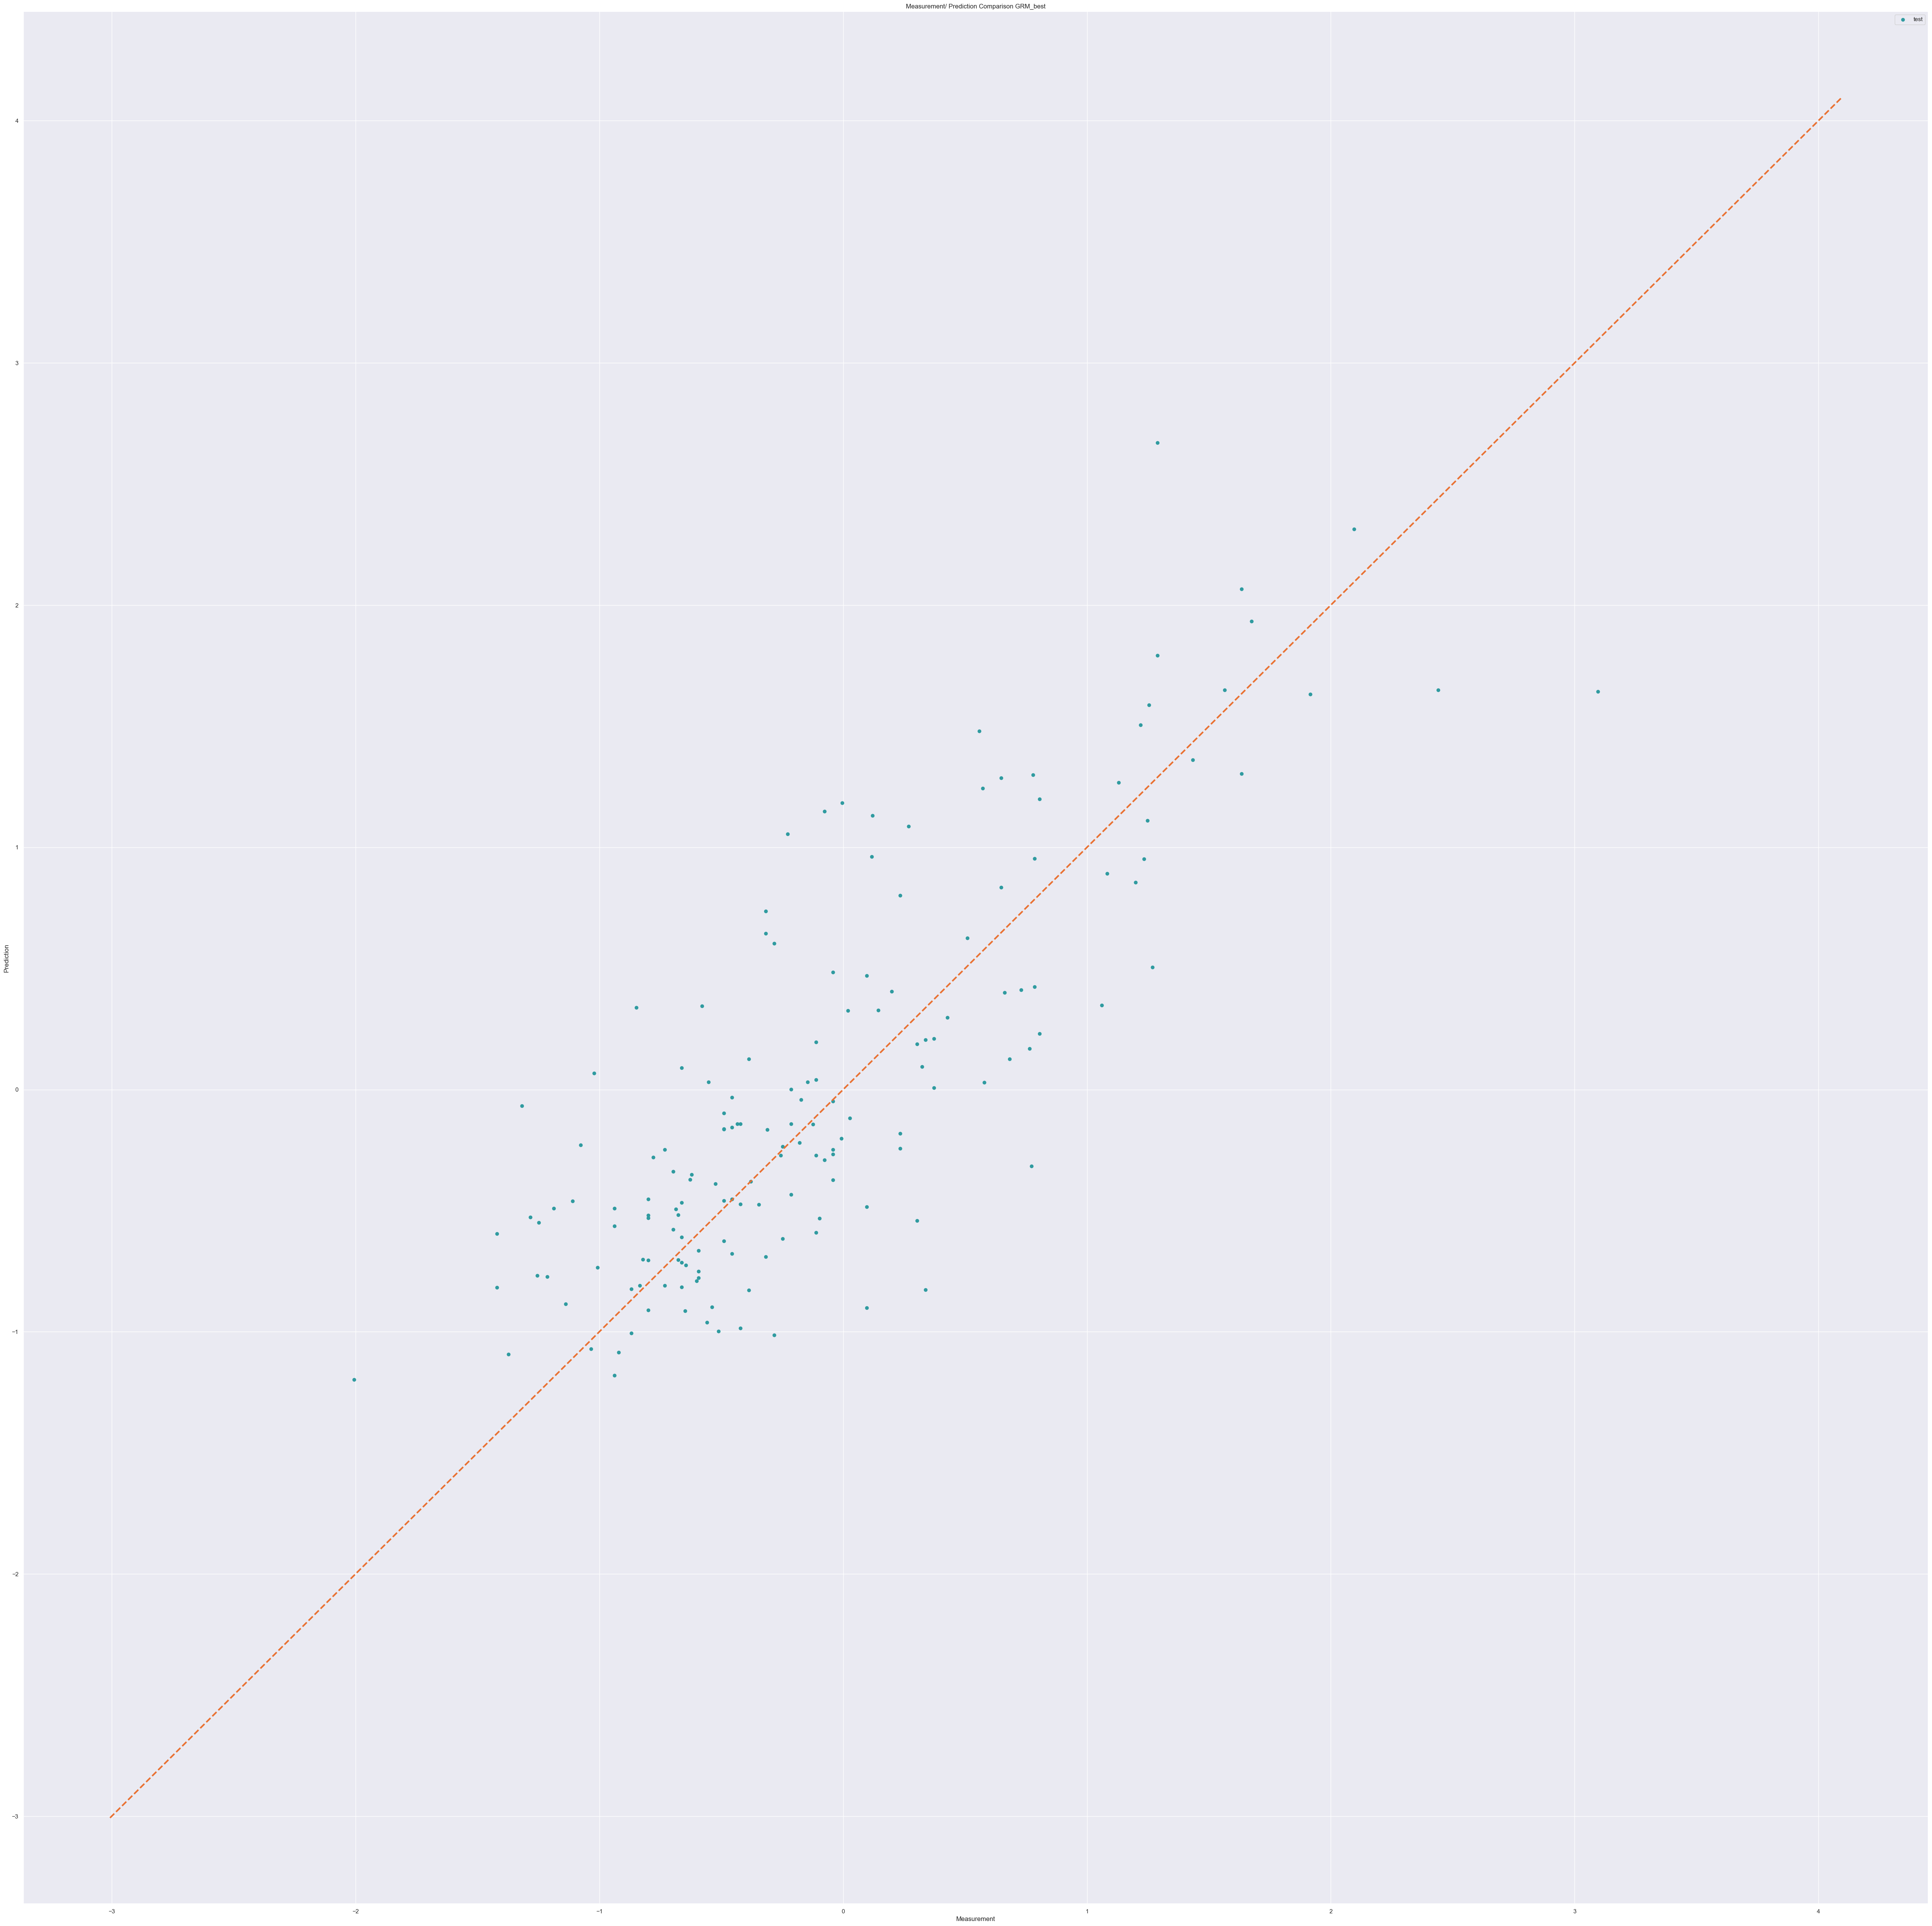

In [652]:
# Visualisieren der Testresultate
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='o', color='#309BA0', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='#E97132', ls='--') ## Trennlinie (x2=x1)

plt.xlabel('Measurement')
plt.ylabel('Prediction')
plt.title('Measurement/ Prediction Comparison GRM_best')
plt.legend()
#plt.savefig('GB_best.png')

#Anhand dieses Diagramms können wir sehen, wie gut unser Modell funktioniert. Die oragne Linie entspricht der Gleichung y=x. Punkte, die auf der Linie liegen, sind also perfekt vorhergesagt. Punkte, die weit von der Linie entfernt sind, stammen von einer schlechten Vorhersage.

In [638]:
feature_importances = best_model.feature_importances_

feature_names = ['sport_fields_result', 'watersports_facilities_result', 'rentals_sporting_goods_result', 'entertainment', 'playground', 'disco', 'wifi', 'TV lounge', 'tourist pitches', 'other accommodation', 'pitch at the waterfront','small pitch (<80 m2)', 'medium pitch  (~100 m2)', 'large pitch  (>110 m2)', 'easy access for disabled people', 'animals allowed', 'kitchen', 'BBQ area', 'open[%]', 'main season', 'low season', 'restaurant_bars_result', 'shopping_result', 'washing_result', 'star category', 'membership_result', 'hiking', 'water_side_result', 'activities', 'public_transport_result']

# Kombiniere Feature-Namen mit deren Wichtigkeiten
feature_importance_with_names = list(zip(feature_names, feature_importances))

# Sortiere nach Wichtigkeit absteigend
feature_importance_with_names_sorted = sorted(feature_importance_with_names, key=lambda x: x[1], reverse=True)

# Ausgabe der sortierten Feature-Importance mit Feature-Namen
for feature, importance in feature_importance_with_names_sorted:
    print(f"{feature}: {importance}")

tourist pitches: 0.21263566421265745
star category: 0.11193160906756237
low season: 0.10705907785906342
small pitch (<80 m2): 0.10655829123747404
open[%]: 0.08444281702818121
pitch at the waterfront: 0.07411874135003615
entertainment: 0.04921039546406649
activities: 0.03282328321756535
other accommodation: 0.029446574375812665
large pitch  (>110 m2): 0.024105324262042524
main season: 0.022976855155192093
sport_fields_result: 0.019902862868723104
animals allowed: 0.013469435687435657
rentals_sporting_goods_result: 0.01344469774055093
hiking: 0.01318416160245718
washing_result: 0.011475306357078588
kitchen: 0.00949837617763923
membership_result: 0.009230952595358626
medium pitch  (~100 m2): 0.008881978636986084
watersports_facilities_result: 0.0076980314465562895
BBQ area: 0.006184572630141264
water_side_result: 0.006008941257126986
TV lounge: 0.005496313822231746
restaurant_bars_result: 0.004831755251814061
public_transport_result: 0.0037748071087174567
shopping_result: 0.00333044596317

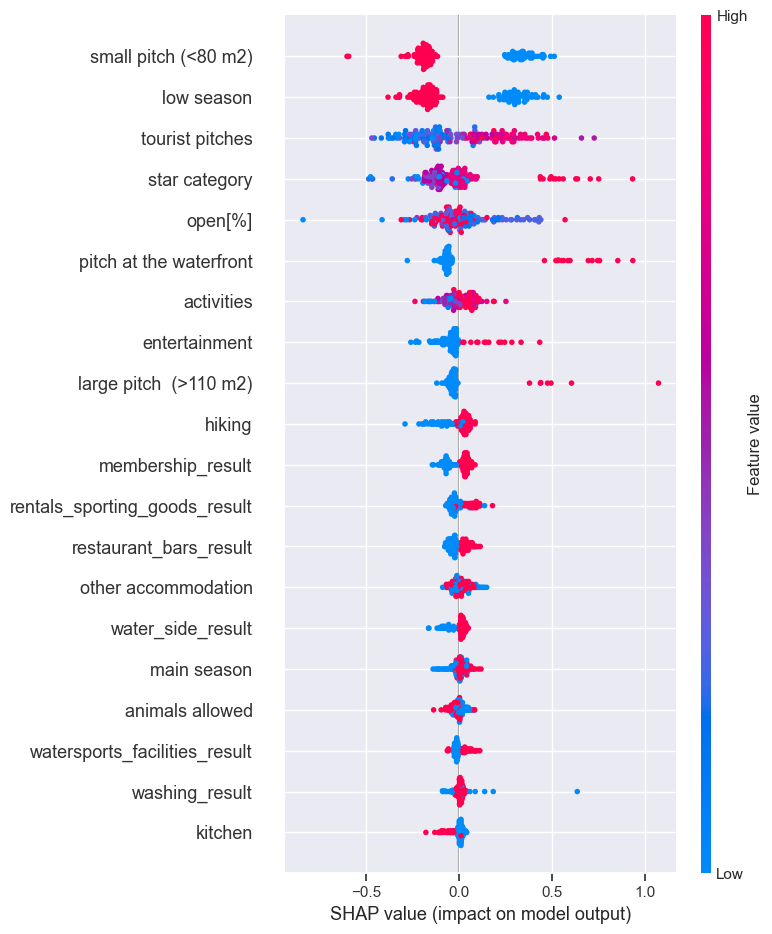

In [633]:
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

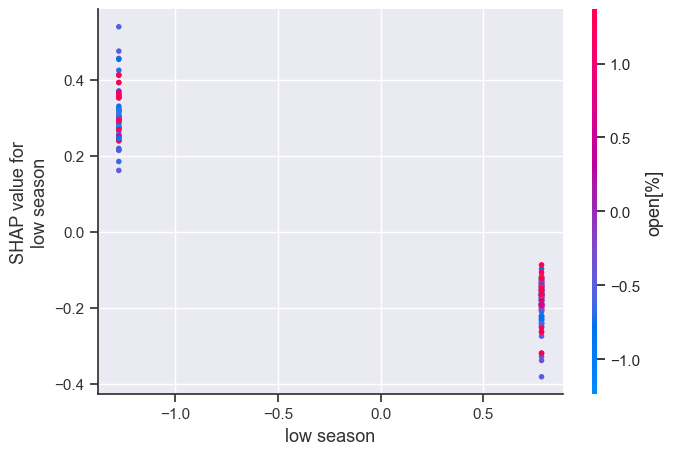

In [634]:
#shap.dependence_plot('main season', shap_values.values, X_test, feature_names=X_test.columns)
shap.dependence_plot('low season', shap_values.values, X_test, interaction_index='open[%]')

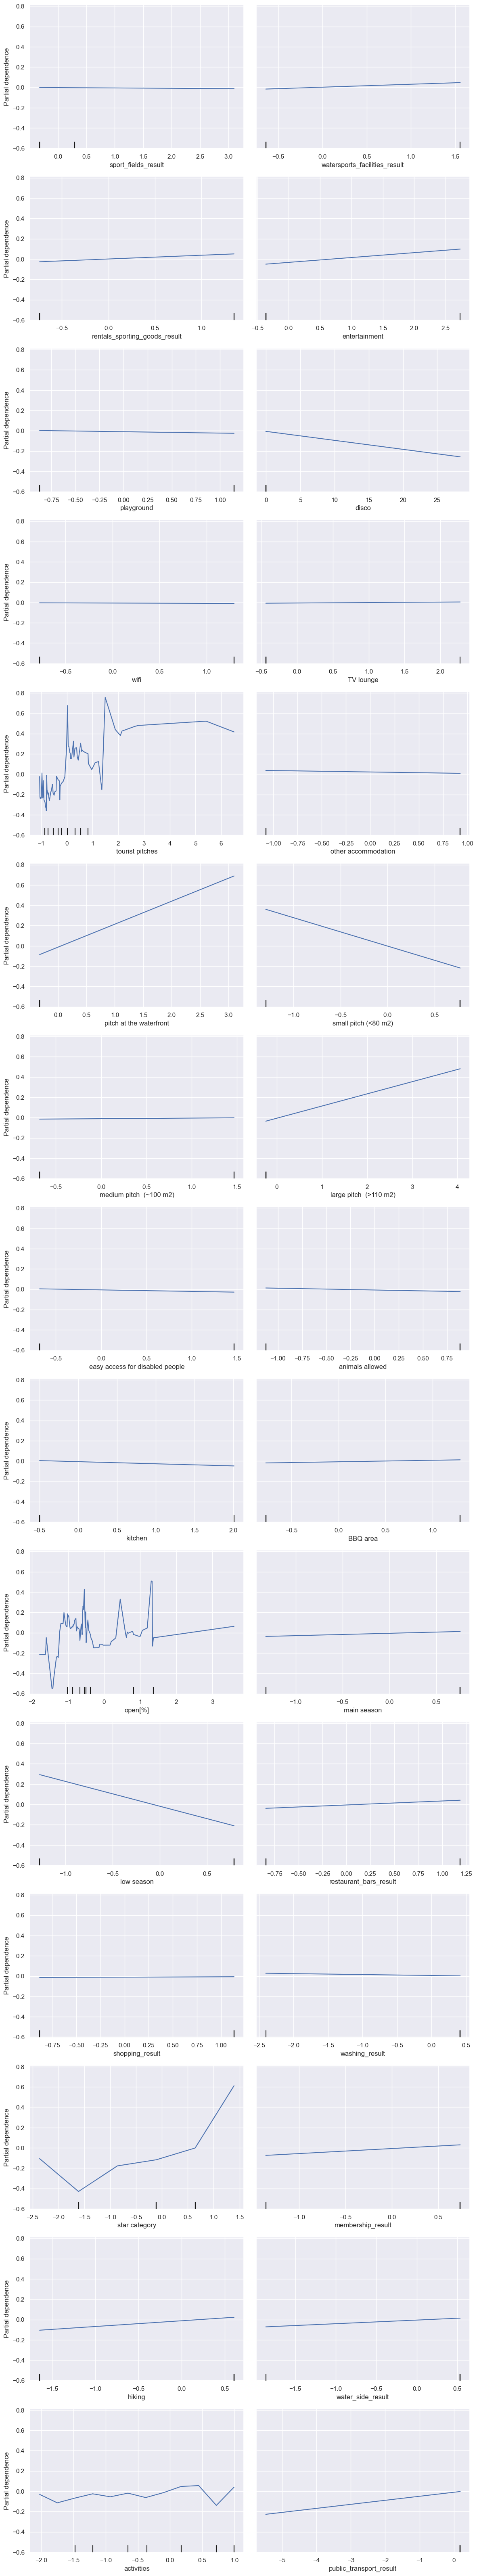

In [635]:
n_cols = 2
n_rows = int(len(X_train.columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12,64))
PartialDependenceDisplay.from_estimator(best_model, X_train, X_train.columns, ax=ax, n_cols=n_cols)
#fig.suptitle('Partial Dependence Plots')
fig.tight_layout()